# Modeling Wine Quality

## Overview

The Washington Winegrower's Association is would like to increase their performance in competitions. They have asked us to develop a model that can predict how well a wine can be expected to perform in competition based on it's chemical properties to help their wineries select wines to send to competition.

## Looking At Our Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
red = pd.read_csv('wines/WineQuality-WhiteWine.csv')

Since we want to create a single model, we will need to put these dataframes together. However, we will want our model to account for differences between red wine and white wine. To manage this, we will add a 'red' column and a 'white' column to indicate this.

In [7]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

In [6]:
white.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  white  red  
0      8.8        6      1    0  
1      9.5        6      1    0  
2     10.1        6      1    0  
3      9.9        6      1    0  
4      9.9        6      1    0

In [8]:
red.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  white  red  
0      8.8        6      0    1  
1      9.5        6      0    1  
2     10.1        6      0    1  
3      9.9        6      0    1  
4      9.9        6      0    1

Then we stack the two datasets on top of each other to create our full dataset.

In [9]:
df = pd.concat([white, red], ignore_index = True)

In [43]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'white', 'red'],
      dtype='object')

In [46]:
df = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'white', 'red', 'quality']]

In [47]:
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
9791            6.2              0.21         0.29             1.6      0.039   
9792            6.6              0.32         0.36             8.0      0.047   
9793            6.5              0.24         0.19             1.2      0.041   
9794            5.5              0.29         0.30             1.1      0.022   
9795            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
9791                 24.0                  92.0  0.99114  3.27       0.50   
9792                 57.0                 168.0  0.99490  3.15       0.46   
9793                 30.0                 111.0  0.99254  2.99       0.46   
9794                 20.0                 110.0  0.98869  3.34       0.38   
9795                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  white  red  quality  
0         8.8      1    0        6  
1         9.5      1    0        6  
2        10.1      1    0        6  
3         9.9      1    0        6  
4         9.9      1    0        6  
...       ...    ...  ...      ...  
9791     11.2      0    1        6  
9792      9.6      0    1        5  
9793      9.4      0    1        6  
9794     12.8      0    1        7  
9795     11.8      0    1        6  

[9796 rows x 14 columns]

In [48]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    9796.000000       9796.000000  9796.000000     9796.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843825          0.100789     0.121014        5.071799   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  9796.000000          9796.000000           9796.000000  9796.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021847            17.006269             42.495895     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991720   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol        white          red  \
count  9796.000000  9796.000000  9796.000000  9796.000000  9796.000000   
mean      3.188267     0.489847    10.514267     0.500000     0.500000   
std       0.150993     0.114120     1.230558     0.500026     0.500026   
min       2.720000     0.220000     8.000000     0.000000     0.000000   
25%       3.090000     0.410000     9.500000     0.000000     0.000000   
50%       3.180000     0.470000    10.400000     0.500000     0.500000   
75%       3.280000     0.550000    11.400000     1.000000     1.000000   
max       3.820000     1.080000    14.200000     1.000000     1.000000   

           quality  
count  9796.000000  
mean      5.877909  
std       0.885593  
min       3.000000  
25%       5.000000  
50%       6.000000  
75%       6.000000  
max       9.000000

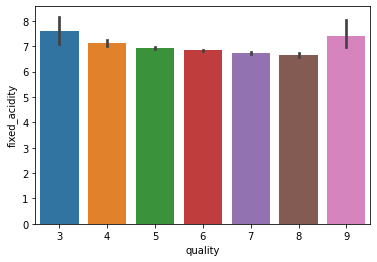

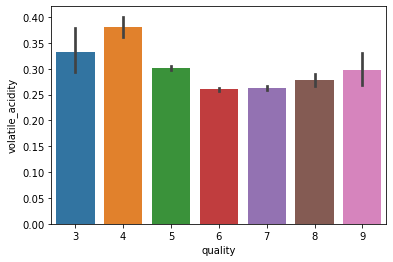

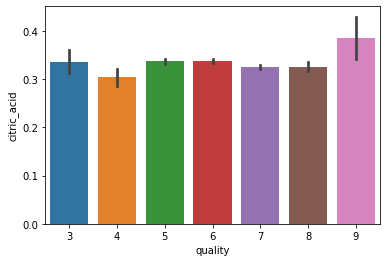

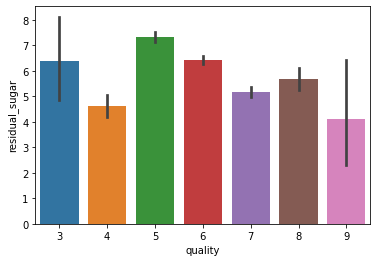

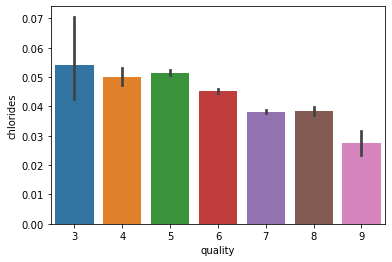

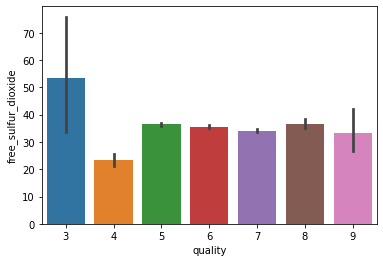

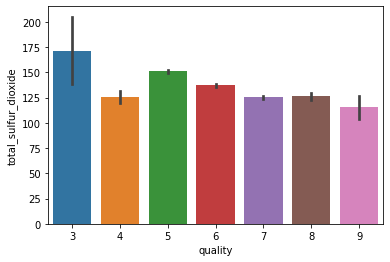

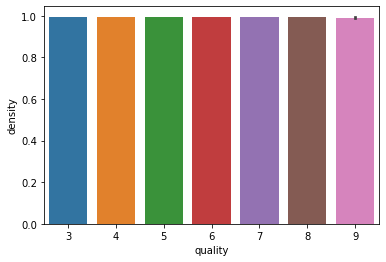

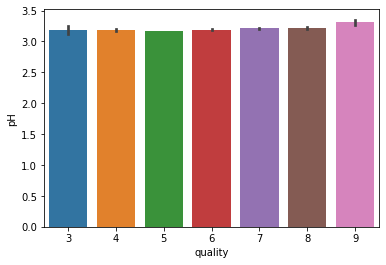

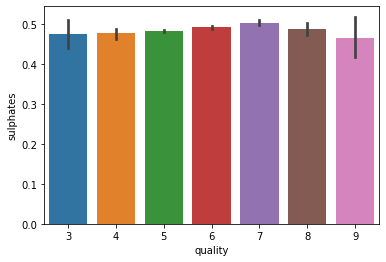

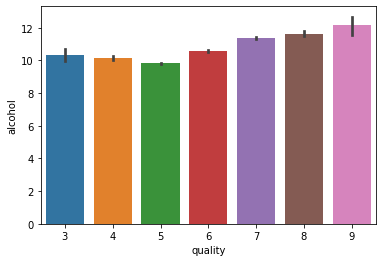

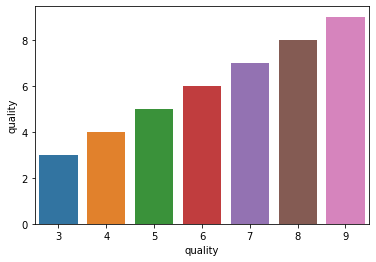

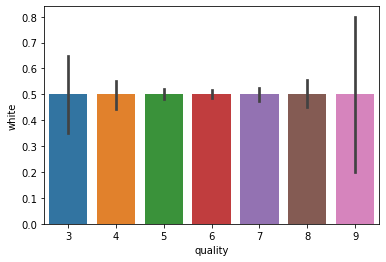

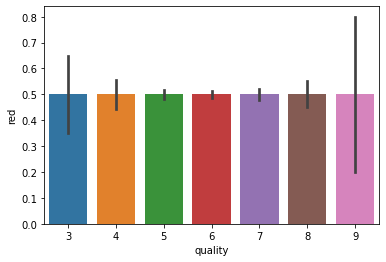

In [14]:
for column in df:
    sns.barplot(data=df, x='quality', y=column)
    plt.show()

## Train/Test Split

In [103]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=16)

## Baseline Model

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
iteration_0 = list(df.columns)
iteration_0.remove('quality')

In [37]:
f = 'quality ~ '+ '+'.join(iteration_0)
model = ols(formula=f, data=train).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     252.7
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:38:36   Log-Likelihood:                -8852.4
No. Observations:                7836   AIC:                         1.773e+04
Df Residuals:                    7823   BIC:                         1.782e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.2157     10.492     10.409      0.000      88.648     129.783
fixed_acidity            0.0738      0.017      4.343      0.000       0.041       0.107
volatile_acidity        -1.8433      0.091    -20.341      0.000      -2.021      -1.666
citric_acid              0.0631      0.075      0.841      0.400      -0.084       0.210
residual_sugar           0.0869      0.006     14.036      0.000       0.075       0.099
chlorides               -0.2068      0.426     -0.485      0.627      -1.042       0.629
free_sulfur_dioxide      0.0038      0.001      5.663      0.000       0.002       0.005
total_sulfur_dioxide    -0.0004      0.000     -1.179      0.238      -0.001       0.000
density               -164.0646     15.961    -10.279      0.000    -195.352    -132.777
pH                       0.7283      0.085      8.544      0.000       0.561       0.895
sulphates                0.6585      0.080      8.253      0.000       0.502       0.815
alcohol                  0.1756      0.020      8.696      0.000       0.136       0.215
white                   54.6124      5.246     10.410      0.000      44.329      64.896
red                     54.6033      5.246     10.408      0.000      44.320      64.887
==============================================================================
Omnibus:                      164.098   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.036
Skew:                           0.069   Prob(JB):                     2.66e-76
Kurtosis:                       4.023   Cond. No.                     8.95e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

With an R-squared of 0.279, this model has plenty of room for improvement! P-values for citric acid, chlorides, and total sulfur dioxide are high, so I think it's wise to first check for collinearity.

In [41]:
predictors = train.iloc[:, :-1]

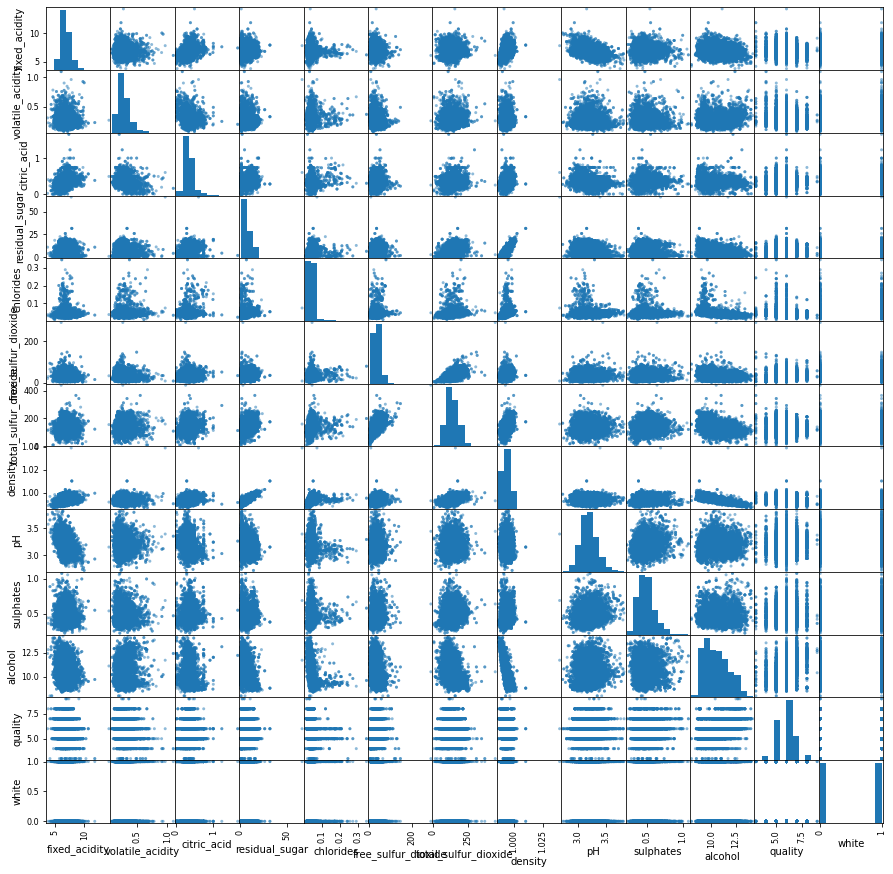

In [42]:
pd.plotting.scatter_matrix(predictors, figsize  = [15, 15]);

In [33]:
abs(predictors.corr()) >= 0.75

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity                  True             False        False   
volatile_acidity              False              True        False   
citric_acid                   False             False         True   
residual_sugar                False             False        False   
chlorides                     False             False        False   
free_sulfur_dioxide           False             False        False   
total_sulfur_dioxide          False             False        False   
density                       False             False        False   
pH                            False             False        False   
sulphates                     False             False        False   
alcohol                       False             False        False   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity                  False      False                False   
volatile_acidity               False      False                False   
citric_acid                    False      False                False   
residual_sugar                  True      False                False   
chlorides                      False       True                False   
free_sulfur_dioxide            False      False                 True   
total_sulfur_dioxide           False      False                False   
density                         True      False                False   
pH                             False      False                False   
sulphates                      False      False                False   
alcohol                        False      False                False   

                      total_sulfur_dioxide  density     pH  sulphates  alcohol  
fixed_acidity                        False    False  False      False    False  
volatile_acidity                     False    False  False      False    False  
citric_acid                          False    False  False      False    False  
residual_sugar                       False     True  False      False    False  
chlorides                            False    False  False      False    False  
free_sulfur_dioxide                  False    False  False      False    False  
total_sulfur_dioxide                  True    False  False      False    False  
density                              False     True  False      False     True  
pH                                   False    False   True      False    False  
sulphates                            False    False  False       True    False  
alcohol                              False     True  False      False     True

Significant correlations exist between density and residual sugar and density and alcohol. We will remove density as a variable in our next iteration.

## Iteration 1

In [104]:
train['chlorides_log'] = train['chlorides'].map(lambda x: np.log(x))
train['total_sulfur_dioxide_log'] = train['total_sulfur_dioxide'].map(lambda x: np.log(x))

<ipython-input-104-65ddf3f56adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['chlorides_log'] = train['chlorides'].map(lambda x: np.log(x))
<ipython-input-104-65ddf3f56adf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_sulfur_dioxide_log'] = train['total_sulfur_dioxide'].map(lambda x: np.log(x))


In [105]:
train.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    7836.000000       7836.000000  7836.000000     7836.000000   
mean        6.854416          0.277924     0.334413        6.406515   
std         0.847404          0.099472     0.121588        5.057279   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  7836.000000          7836.000000           7836.000000  7836.000000   
mean      0.045852            35.432044            138.473711     0.994038   
std       0.022056            17.023326             42.420363     0.002969   
min       0.009000             2.000000              9.000000     0.987130   
25%       0.036000            23.000000            109.000000     0.991740   
50%       0.043000            34.000000            134.000000     0.993800   
75%       0.050000            46.000000            167.000000     0.996120   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol        white          red  \
count  7836.000000  7836.000000  7836.000000  7836.000000  7836.000000   
mean      3.188590     0.490348    10.509238     0.500510     0.499490   
std       0.150608     0.113539     1.227865     0.500032     0.500032   
min       2.720000     0.220000     8.000000     0.000000     0.000000   
25%       3.090000     0.410000     9.500000     0.000000     0.000000   
50%       3.180000     0.470000    10.400000     1.000000     0.000000   
75%       3.280000     0.550000    11.400000     1.000000     1.000000   
max       3.820000     1.080000    14.200000     1.000000     1.000000   

           quality  chlorides_log  total_sulfur_dioxide_log  
count  7836.000000    7836.000000               7836.000000  
mean      5.874553      -3.147906                  4.879363  
std       0.882192       0.332010                  0.334859  
min       3.000000      -4.710531                  2.197225  
25%       5.000000      -3.324236                  4.691348  
50%       6.000000      -3.146555                  4.897840  
75%       6.000000      -2.995732                  5.117994  
max       9.000000      -1.061317                  6.086775

In [107]:
f = 'quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+free_sulfur_dioxide+pH+sulphates+alcohol+white+red+chlorides_log+total_sulfur_dioxide_log'
model = ols(formula=f, data=train).fit()

In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     262.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:47:32   Log-Likelihood:                -8905.0
No. Observations:                7836   AIC:                         1.783e+04
Df Residuals:                    7824   BIC:                         1.792e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.9960      0.205      4.865      0.000       0.595       1.397
fixed_acidity               -0.0613      0.012     -5.260      0.000      -0.084      -0.038
volatile_acidity            -2.0145      0.090    -22.467      0.000      -2.190      -1.839
citric_acid                 -0.0004      0.075     -0.005      0.996      -0.147       0.147
residual_sugar               0.0249      0.002     12.356      0.000       0.021       0.029
free_sulfur_dioxide          0.0029      0.001      4.536      0.000       0.002       0.004
pH                           0.1214      0.065      1.854      0.064      -0.007       0.250
sulphates                    0.3909      0.077      5.068      0.000       0.240       0.542
alcohol                      0.3653      0.009     39.384      0.000       0.347       0.383
white                        0.5024      0.103      4.889      0.000       0.301       0.704
red                          0.4936      0.103      4.807      0.000       0.292       0.695
chlorides_log               -0.1200      0.030     -3.978      0.000      -0.179      -0.061
total_sulfur_dioxide_log     0.0618      0.036      1.720      0.085      -0.009       0.132
==============================================================================
Omnibus:                      150.339   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.264
Skew:                           0.065   Prob(JB):                     1.90e-67
Kurtosis:                       3.961   Cond. No.                     4.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

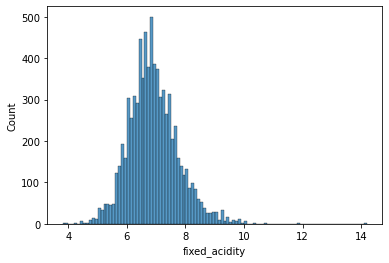

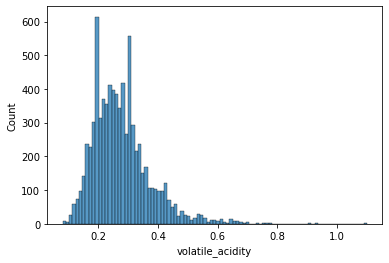

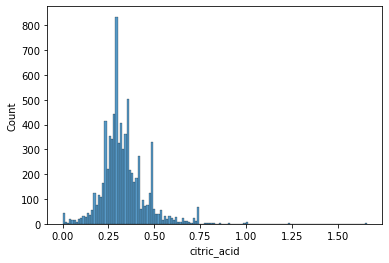

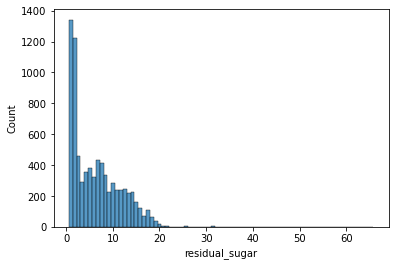

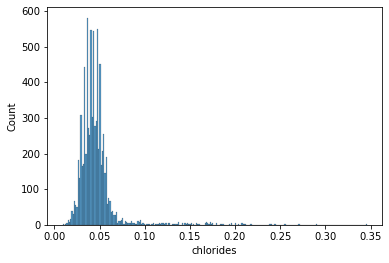

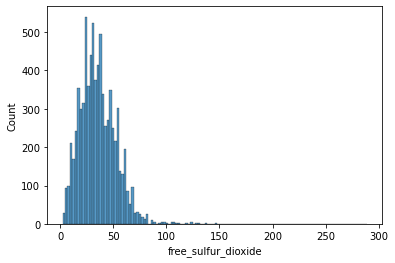

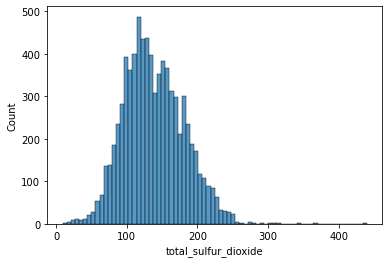

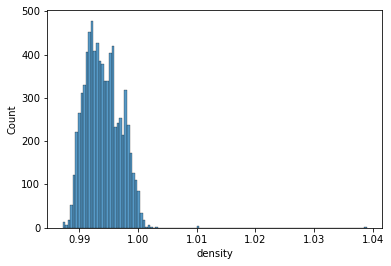

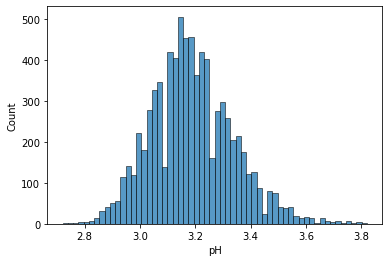

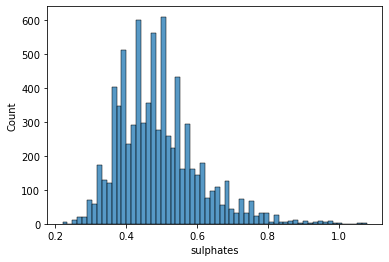

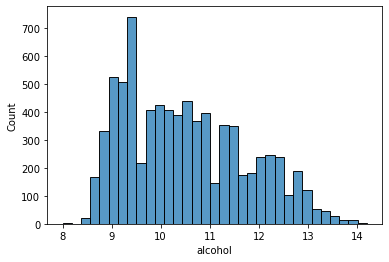

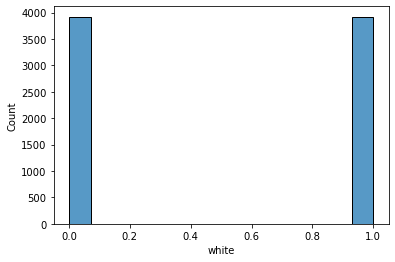

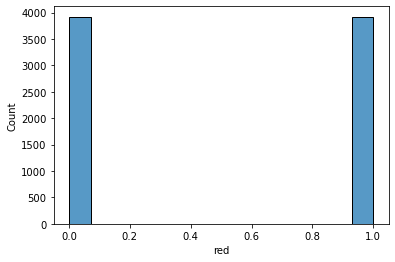

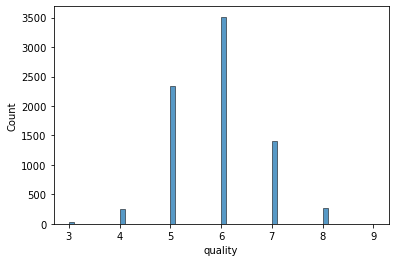

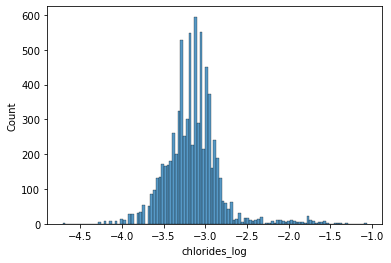

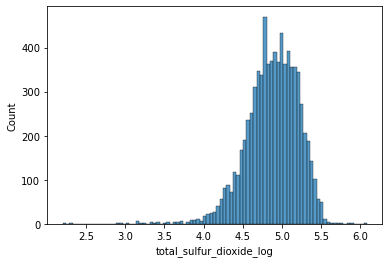

In [109]:
for column in train:
    sns.histplot(data=train, x=column)
    plt.show()

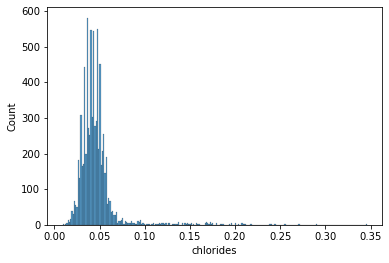

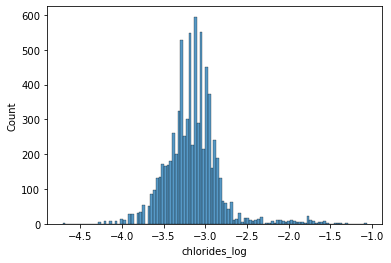

In [110]:
sns.histplot(data=train, x='chlorides')
plt.show()
sns.histplot(data=train, x='chlorides_log')
plt.show()

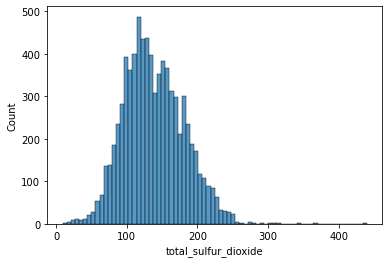

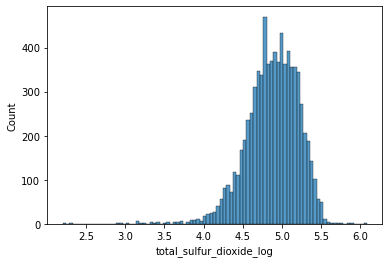

In [111]:
sns.histplot(data=train, x='total_sulfur_dioxide')
plt.show()
sns.histplot(data=train, x='total_sulfur_dioxide_log')
plt.show()

## Iteration 2

In [129]:
train['volatile_acidity_log'] = train['volatile_acidity'].map(lambda x: np.log(x))
train['residual_sugar_log'] = train['residual_sugar'].map(lambda x: np.log(x))
train['free_sulfur_dioxide_log'] = train['free_sulfur_dioxide'].map(lambda x: np.log(x))
train['sulphates_log'] = train['sulphates'].map(lambda x: np.log(x))

<ipython-input-129-1323f32790b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['volatile_acidity_log'] = train['volatile_acidity'].map(lambda x: np.log(x))
<ipython-input-129-1323f32790b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['residual_sugar_log'] = train['residual_sugar'].map(lambda x: np.log(x))
<ipython-input-129-1323f32790b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [130]:
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
7353            7.8              0.32         0.33            10.4      0.031   
2915            6.9              0.14         0.38             1.0      0.041   
4883            4.9              0.47         0.17             1.9      0.035   
7568            5.9              0.34         0.31             2.0      0.030   
9045            6.8              0.18         0.35             5.4      0.054   
...             ...               ...          ...             ...        ...   
635             5.9              0.14         0.25             4.5      0.027   
1345            7.3              0.39         0.37             1.1      0.043   
581             5.7              0.18         0.22             4.2      0.042   
2169            7.4              0.19         0.30            12.8      0.053   
6825            7.1              0.25         0.28             1.6      0.052   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
7353                 47.0                 194.0  0.99692  3.07       0.58   
2915                 22.0                  81.0  0.99043  3.03       0.54   
4883                 60.0                 148.0  0.98964  3.27       0.35   
7568                 38.0                 142.0  0.98892  3.40       0.41   
9045                 53.0                 143.0  0.99287  3.10       0.54   
...                   ...                   ...      ...   ...        ...   
635                  34.0                 140.0  0.99340  3.49       0.51   
1345                 36.0                 113.0  0.99100  3.39       0.48   
581                  25.0                 111.0  0.99400  3.35       0.39   
2169                 48.5                 229.0  0.99860  3.14       0.49   
6825                 46.0                 169.0  0.99260  3.05       0.41   

      alcohol  white  red  quality  chlorides_log  total_sulfur_dioxide_log  \
7353      9.6      0    1        6      -3.473768                  5.267858   
2915     11.4      1    0        6      -3.194183                  4.394449   
4883     11.5      1    0        6      -3.352407                  4.997212   
7568     12.9      0    1        7      -3.506558                  4.955827   
9045     11.0      0    1        7      -2.918771                  4.962845   
...       ...    ...  ...      ...            ...                       ...   
635      10.8      1    0        6      -3.611918                  4.941642   
1345     12.7      1    0        8      -3.146555                  4.727388   
581       9.4      1    0        5      -3.170086                  4.709530   
2169      9.1      1    0        7      -2.937463                  5.433722   
6825     10.5      0    1        5      -2.956512                  5.129899   

      volatile_acidity_log  residual_sugar_log  free_sulfur_dioxide_log  \
7353             -1.139434            2.341806                 3.850148   
2915             -1.966113            0.000000                 3.091042   
4883             -0.755023            0.641854                 4.094345   
7568             -1.078810            0.693147                 3.637586   
9045             -1.714798            1.686399                 3.970292   
...                    ...                 ...                      ...   
635              -1.966113            1.504077                 3.526361   
1345             -0.941609            0.095310                 3.583519   
581              -1.714798            1.435085                 3.218876   
2169             -1.660731            2.549445                 3.881564   
6825             -1.386294            0.470004                 3.828641   

      sulphates_log  
7353      -0.544727  
2915      -0.616186  
4883      -1.049822  
7568      -0.891598  
9045      -0.616186  
...             ...  
635       -0.673345  
1345      -0.733969  
581       -0.941609  
2169      -0.713350  
6825      -0.891

In [132]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'white', 'red', 'quality',
       'chlorides_log', 'total_sulfur_dioxide_log', 'volatile_acidity_log',
       'residual_sugar_log', 'free_sulfur_dioxide_log', 'sulphates_log'],
      dtype='object')

In [133]:
f = 'quality ~ fixed_acidity + citric_acid + pH + alcohol + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model = ols(formula=f, data=train).fit()

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     291.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:12:19   Log-Likelihood:                -8789.0
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.769e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4904      0.208      2.360      0.018       0.083       0.898
fixed_acidity               -0.0469      0.011     -4.075      0.000      -0.069      -0.024
citric_acid                  0.0261      0.074      0.355      0.723      -0.118       0.171
pH                           0.1136      0.064      1.761      0.078      -0.013       0.240
alcohol                      0.3545      0.009     39.562      0.000       0.337       0.372
white                        0.2493      0.104      2.391      0.017       0.045       0.454
red                          0.2411      0.104      2.313      0.021       0.037       0.445
chlorides_log               -0.1145      0.030     -3.854      0.000      -0.173      -0.056
total_sulfur_dioxide_log    -0.1636      0.037     -4.376      0.000      -0.237      -0.090
volatile_acidity_log        -0.5639      0.027    -21.110      0.000      -0.616      -0.512
residual_sugar_log           0.1371      0.011     12.708      0.000       0.116       0.158
free_sulfur_dioxide_log      0.2899      0.021     14.041      0.000       0.249       0.330
sulphates_log                0.2082      0.039      5.341      0.000       0.132       0.285
==============================================================================
Omnibus:                      152.683   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.055
Skew:                           0.109   Prob(JB):                     8.50e-65
Kurtosis:                       3.925   Cond. No.                     2.12e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

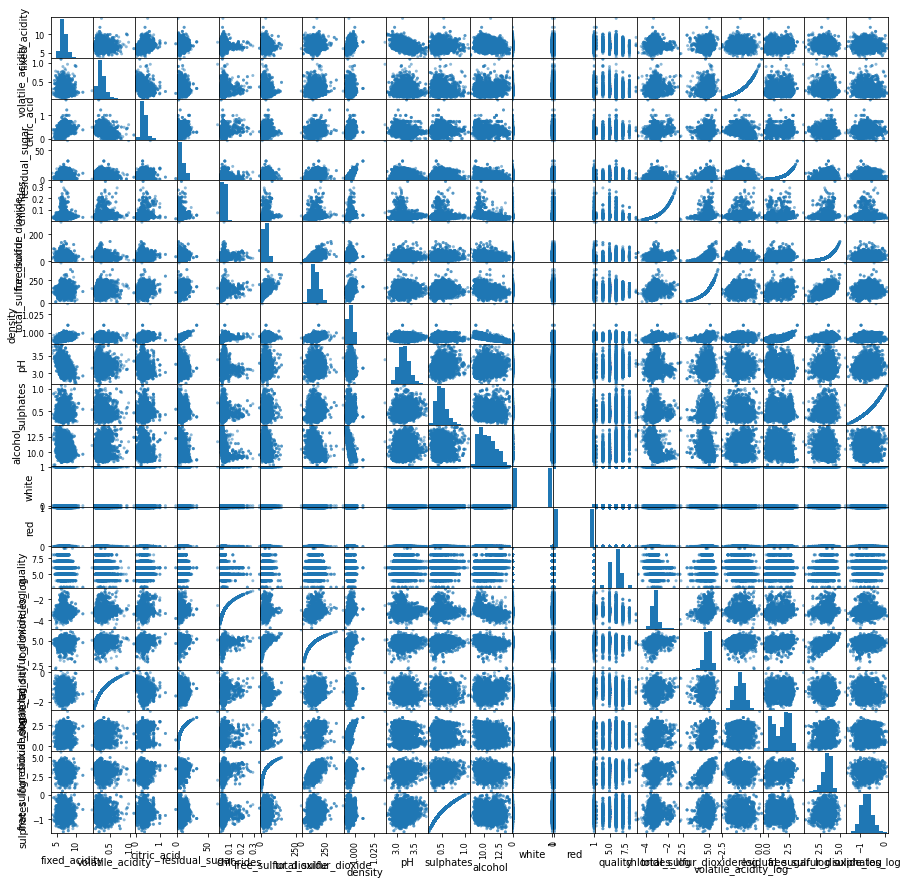

In [135]:
pd.plotting.scatter_matrix(train, figsize  = [15, 15]);

In [137]:
train.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity                  1.000000         -0.034254     0.284582   
volatile_acidity              -0.034254          1.000000    -0.151948   
citric_acid                    0.284582         -0.151948     1.000000   
residual_sugar                 0.088227          0.056404     0.090571   
chlorides                      0.021693          0.059190     0.109606   
free_sulfur_dioxide           -0.049283         -0.096623     0.099198   
total_sulfur_dioxide           0.091298          0.084117     0.123087   
density                        0.269569          0.010936     0.147002   
pH                            -0.428060         -0.023230    -0.167299   
sulphates                     -0.020029         -0.035545     0.060007   
alcohol                       -0.123766          0.077681    -0.079911   
white                         -0.005171         -0.000928     0.002818   
red                            0.005171          0.000928    -0.002818   
quality                       -0.114851         -0.185210    -0.006309   
chlorides_log                  0.053570          0.028042     0.093820   
total_sulfur_dioxide_log       0.071306          0.058012     0.116177   
volatile_acidity_log          -0.035678          0.965328    -0.136524   
residual_sugar_log             0.068598          0.089406     0.062307   
free_sulfur_dioxide_log       -0.060996         -0.117630     0.085819   
sulphates_log                 -0.023406         -0.035456     0.060733   

                          residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity                   0.088227   0.021693            -0.049283   
volatile_acidity                0.056404   0.059190            -0.096623   
citric_acid                     0.090571   0.109606             0.099198   
residual_sugar                  1.000000   0.081430             0.296526   
chlorides                       0.081430   1.000000             0.104223   
free_sulfur_dioxide             0.296526   0.104223             1.000000   
total_sulfur_dioxide            0.398195   0.194886             0.615105   
density                         0.836888   0.250600             0.297594   
pH                             -0.205713  -0.092029            -0.002342   
sulphates                      -0.030166   0.011951             0.058720   
alcohol                        -0.454606  -0.357455            -0.254443   
white                          -0.001890  -0.007828            -0.001117   
red                             0.001890   0.007828             0.001117   
quality                        -0.093764  -0.206406             0.004863   
chlorides_log                   0.168148   0.911270             0.144350   
total_sulfur_dioxide_log        0.383120   0.191887             0.599516   
volatile_acidity_log            0.077815   0.057615            -0.076602   
residual_sugar_log              0.933394   0.068792             0.306449   
free_sulfur_dioxide_log         0.299699   0.092028             0.923102   
sulphates_log                  -0.020252   0.026991             0.060840   

                          total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                         0.091298  0.269569 -0.428060  -0.020029   
volatile_acidity                      0.084117  0.010936 -0.023230  -0.035545   
citric_acid                           0.123087  0.147002 -0.167299   0.060007   
residual_sugar                        0.398195  0.836888 -0.205713  -0.030166   
chlorides                             0.194886  0.250600 -0.092029   0.011951   
free_sulfur_dioxide                   0.615105  0.297594 -0.002342   0.058720   
total_sulfur_dioxide                  1.000000  0.532340  0.000994   0.133808   
density                               0.532340  1.000000 -0.104990   0.072370   
pH                                    0.000994 -0.104990  1.000000   0.160530   
sulphates                             0.133808  0.072370  0.1605

## Iteration 3

In [138]:
train['scaled_citric_acid'] = (train['citric_acid']-np.mean(train['citric_acid']))/(max(train['citric_acid'])-min(train['citric_acid']))

<ipython-input-138-0d71470a55b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['scaled_citric_acid'] = (train['citric_acid']-np.mean(train['citric_acid']))/(max(train['citric_acid'])-min(train['citric_acid']))


In [139]:
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
7353            7.8              0.32         0.33            10.4      0.031   
2915            6.9              0.14         0.38             1.0      0.041   
4883            4.9              0.47         0.17             1.9      0.035   
7568            5.9              0.34         0.31             2.0      0.030   
9045            6.8              0.18         0.35             5.4      0.054   
...             ...               ...          ...             ...        ...   
635             5.9              0.14         0.25             4.5      0.027   
1345            7.3              0.39         0.37             1.1      0.043   
581             5.7              0.18         0.22             4.2      0.042   
2169            7.4              0.19         0.30            12.8      0.053   
6825            7.1              0.25         0.28             1.6      0.052   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
7353                 47.0                 194.0  0.99692  3.07       0.58   
2915                 22.0                  81.0  0.99043  3.03       0.54   
4883                 60.0                 148.0  0.98964  3.27       0.35   
7568                 38.0                 142.0  0.98892  3.40       0.41   
9045                 53.0                 143.0  0.99287  3.10       0.54   
...                   ...                   ...      ...   ...        ...   
635                  34.0                 140.0  0.99340  3.49       0.51   
1345                 36.0                 113.0  0.99100  3.39       0.48   
581                  25.0                 111.0  0.99400  3.35       0.39   
2169                 48.5                 229.0  0.99860  3.14       0.49   
6825                 46.0                 169.0  0.99260  3.05       0.41   

      ...  white  red  quality  chlorides_log  total_sulfur_dioxide_log  \
7353  ...      0    1        6      -3.473768                  5.267858   
2915  ...      1    0        6      -3.194183                  4.394449   
4883  ...      1    0        6      -3.352407                  4.997212   
7568  ...      0    1        7      -3.506558                  4.955827   
9045  ...      0    1        7      -2.918771                  4.962845   
...   ...    ...  ...      ...            ...                       ...   
635   ...      1    0        6      -3.611918                  4.941642   
1345  ...      1    0        8      -3.146555                  4.727388   
581   ...      1    0        5      -3.170086                  4.709530   
2169  ...      1    0        7      -2.937463                  5.433722   
6825  ...      0    1        5      -2.956512                  5.129899   

      volatile_acidity_log  residual_sugar_log  free_sulfur_dioxide_log  \
7353             -1.139434            2.341806                 3.850148   
2915             -1.966113            0.000000                 3.091042   
4883             -0.755023            0.641854                 4.094345   
7568             -1.078810            0.693147                 3.637586   
9045             -1.714798            1.686399                 3.970292   
...                    ...                 ...                      ...   
635              -1.966113            1.504077                 3.526361   
1345             -0.941609            0.095310                 3.583519   
581              -1.714798            1.435085                 3.218876   
2169             -1.660731            2.549445                 3.881564   
6825             -1.386294            0.470004                 3.828641   

      sulphates_log  scaled_citric_acid  
7353      -0.544727           -0.002658  
2915      -0.616186            0.027462  
4883      -1.049822           -0.099044  
7568      -0.891598           -0.014707  
9045      -0.616186            0.009390  
...             ...                 ...  
635       -0

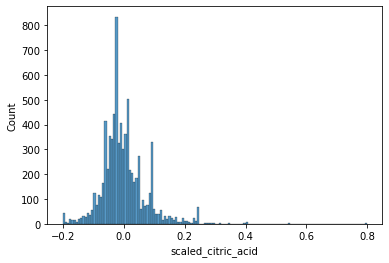

In [141]:
sns.histplot(data=train, x='scaled_citric_acid');

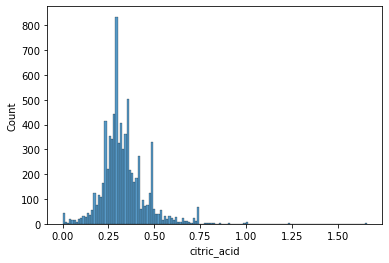

In [142]:
sns.histplot(data=train, x='citric_acid');

In [147]:
train['citric_acid'] = train['citric_acid'].map(lambda x: x+1)

<ipython-input-147-bb9c4832a600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['citric_acid'] = train['citric_acid'].map(lambda x: x+1)


In [148]:
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
7353            7.8              0.32         1.33            10.4      0.031   
2915            6.9              0.14         1.38             1.0      0.041   
4883            4.9              0.47         1.17             1.9      0.035   
7568            5.9              0.34         1.31             2.0      0.030   
9045            6.8              0.18         1.35             5.4      0.054   
...             ...               ...          ...             ...        ...   
635             5.9              0.14         1.25             4.5      0.027   
1345            7.3              0.39         1.37             1.1      0.043   
581             5.7              0.18         1.22             4.2      0.042   
2169            7.4              0.19         1.30            12.8      0.053   
6825            7.1              0.25         1.28             1.6      0.052   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
7353                 47.0                 194.0  0.99692  3.07       0.58   
2915                 22.0                  81.0  0.99043  3.03       0.54   
4883                 60.0                 148.0  0.98964  3.27       0.35   
7568                 38.0                 142.0  0.98892  3.40       0.41   
9045                 53.0                 143.0  0.99287  3.10       0.54   
...                   ...                   ...      ...   ...        ...   
635                  34.0                 140.0  0.99340  3.49       0.51   
1345                 36.0                 113.0  0.99100  3.39       0.48   
581                  25.0                 111.0  0.99400  3.35       0.39   
2169                 48.5                 229.0  0.99860  3.14       0.49   
6825                 46.0                 169.0  0.99260  3.05       0.41   

      ...  white  red  quality  chlorides_log  total_sulfur_dioxide_log  \
7353  ...      0    1        6      -3.473768                  5.267858   
2915  ...      1    0        6      -3.194183                  4.394449   
4883  ...      1    0        6      -3.352407                  4.997212   
7568  ...      0    1        7      -3.506558                  4.955827   
9045  ...      0    1        7      -2.918771                  4.962845   
...   ...    ...  ...      ...            ...                       ...   
635   ...      1    0        6      -3.611918                  4.941642   
1345  ...      1    0        8      -3.146555                  4.727388   
581   ...      1    0        5      -3.170086                  4.709530   
2169  ...      1    0        7      -2.937463                  5.433722   
6825  ...      0    1        5      -2.956512                  5.129899   

      volatile_acidity_log  residual_sugar_log  free_sulfur_dioxide_log  \
7353             -1.139434            2.341806                 3.850148   
2915             -1.966113            0.000000                 3.091042   
4883             -0.755023            0.641854                 4.094345   
7568             -1.078810            0.693147                 3.637586   
9045             -1.714798            1.686399                 3.970292   
...                    ...                 ...                      ...   
635              -1.966113            1.504077                 3.526361   
1345             -0.941609            0.095310                 3.583519   
581              -1.714798            1.435085                 3.218876   
2169             -1.660731            2.549445                 3.881564   
6825             -1.386294            0.470004                 3.828641   

      sulphates_log  scaled_citric_acid  
7353      -0.544727           -0.002658  
2915      -0.616186            0.027462  
4883      -1.049822           -0.099044  
7568      -0.891598           -0.014707  
9045      -0.616186            0.009390  
...             ...                 ...  
635       -0

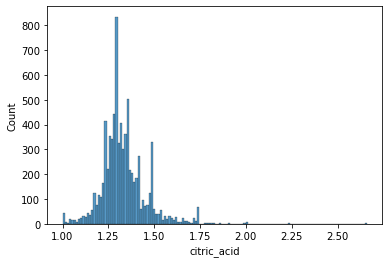

In [149]:
sns.histplot(data=train, x='citric_acid');

In [150]:
train['citric_acid_log'] = train['citric_acid'].map(lambda x: np.log(x))

<ipython-input-150-662a32c4a65b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['citric_acid_log'] = train['citric_acid'].map(lambda x: np.log(x))


In [151]:
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
7353            7.8              0.32         1.33            10.4      0.031   
2915            6.9              0.14         1.38             1.0      0.041   
4883            4.9              0.47         1.17             1.9      0.035   
7568            5.9              0.34         1.31             2.0      0.030   
9045            6.8              0.18         1.35             5.4      0.054   
...             ...               ...          ...             ...        ...   
635             5.9              0.14         1.25             4.5      0.027   
1345            7.3              0.39         1.37             1.1      0.043   
581             5.7              0.18         1.22             4.2      0.042   
2169            7.4              0.19         1.30            12.8      0.053   
6825            7.1              0.25         1.28             1.6      0.052   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
7353                 47.0                 194.0  0.99692  3.07       0.58   
2915                 22.0                  81.0  0.99043  3.03       0.54   
4883                 60.0                 148.0  0.98964  3.27       0.35   
7568                 38.0                 142.0  0.98892  3.40       0.41   
9045                 53.0                 143.0  0.99287  3.10       0.54   
...                   ...                   ...      ...   ...        ...   
635                  34.0                 140.0  0.99340  3.49       0.51   
1345                 36.0                 113.0  0.99100  3.39       0.48   
581                  25.0                 111.0  0.99400  3.35       0.39   
2169                 48.5                 229.0  0.99860  3.14       0.49   
6825                 46.0                 169.0  0.99260  3.05       0.41   

      ...  red  quality  chlorides_log  total_sulfur_dioxide_log  \
7353  ...    1        6      -3.473768                  5.267858   
2915  ...    0        6      -3.194183                  4.394449   
4883  ...    0        6      -3.352407                  4.997212   
7568  ...    1        7      -3.506558                  4.955827   
9045  ...    1        7      -2.918771                  4.962845   
...   ...  ...      ...            ...                       ...   
635   ...    0        6      -3.611918                  4.941642   
1345  ...    0        8      -3.146555                  4.727388   
581   ...    0        5      -3.170086                  4.709530   
2169  ...    0        7      -2.937463                  5.433722   
6825  ...    1        5      -2.956512                  5.129899   

      volatile_acidity_log  residual_sugar_log  free_sulfur_dioxide_log  \
7353             -1.139434            2.341806                 3.850148   
2915             -1.966113            0.000000                 3.091042   
4883             -0.755023            0.641854                 4.094345   
7568             -1.078810            0.693147                 3.637586   
9045             -1.714798            1.686399                 3.970292   
...                    ...                 ...                      ...   
635              -1.966113            1.504077                 3.526361   
1345             -0.941609            0.095310                 3.583519   
581              -1.714798            1.435085                 3.218876   
2169             -1.660731            2.549445                 3.881564   
6825             -1.386294            0.470004                 3.828641   

      sulphates_log  scaled_citric_acid  citric_acid_log  
7353      -0.544727           -0.002658         0.285179  
2915      -0.616186            0.027462         0.322083  
4883      -1.049822           -0.099044         0.157004  
7568      -0.891598           -0.014707         0.270027  
9045      -0.616186            0.009390         0.300105  
...             ...                 

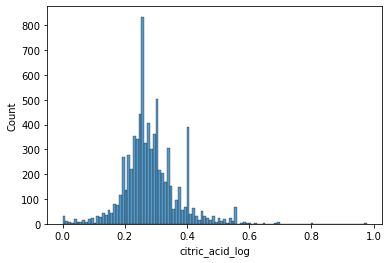

In [152]:
sns.histplot(data=train, x='citric_acid_log');

In [153]:
f = 'quality ~ fixed_acidity + citric_acid_log + pH + alcohol + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model = ols(formula=f, data=train).fit()

In [154]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     292.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:30:46   Log-Likelihood:                -8788.5
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.768e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4866      0.208      2.341      0.019       0.079       0.894
fixed_acidity               -0.0488      0.012     -4.232      0.000      -0.071      -0.026
citric_acid_log              0.1078      0.103      1.048      0.295      -0.094       0.310
pH                           0.1168      0.064      1.811      0.070      -0.010       0.243
alcohol                      0.3541      0.009     39.482      0.000       0.337       0.372
white                        0.2474      0.104      2.372      0.018       0.043       0.452
red                          0.2392      0.104      2.295      0.022       0.035       0.444
chlorides_log               -0.1159      0.030     -3.902      0.000      -0.174      -0.058
total_sulfur_dioxide_log    -0.1653      0.037     -4.420      0.000      -0.239      -0.092
volatile_acidity_log        -0.5606      0.027    -20.902      0.000      -0.613      -0.508
residual_sugar_log           0.1369      0.011     12.686      0.000       0.116       0.158
free_sulfur_dioxide_log      0.2897      0.021     14.029      0.000       0.249       0.330
sulphates_log                0.2064      0.039      5.293      0.000       0.130       0.283
==============================================================================
Omnibus:                      153.472   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.783
Skew:                           0.110   Prob(JB):                     3.58e-65
Kurtosis:                       3.928   Cond. No.                     1.49e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

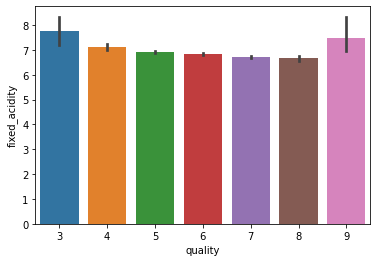

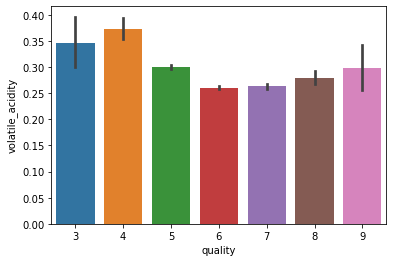

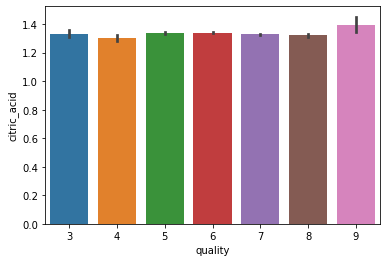

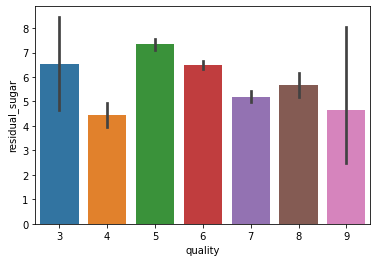

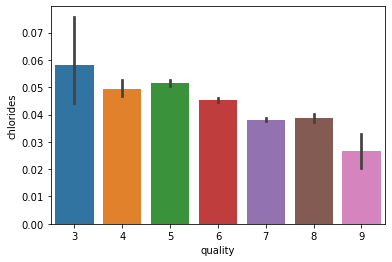

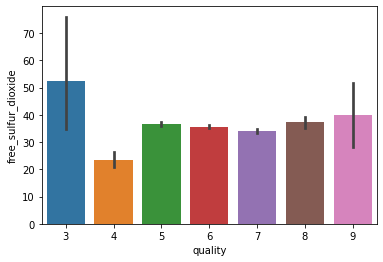

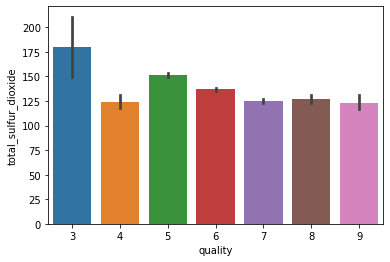

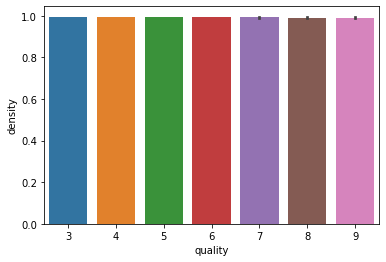

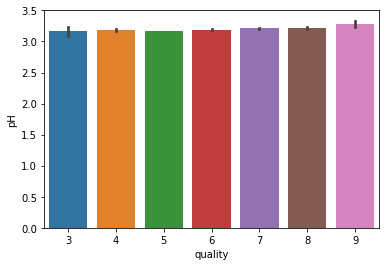

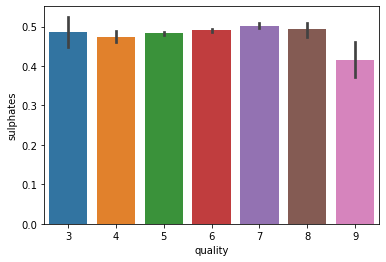

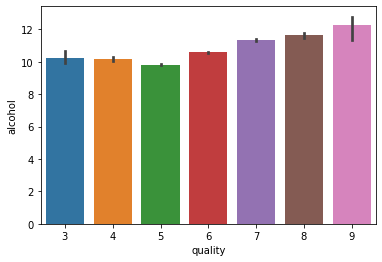

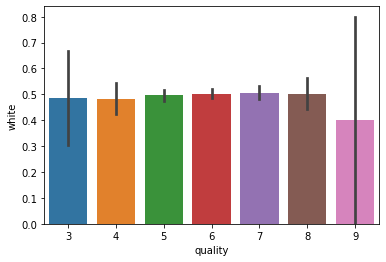

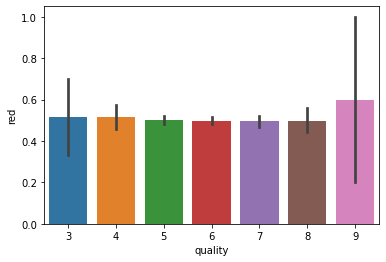

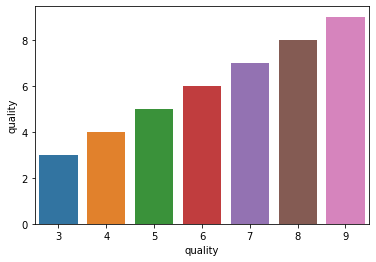

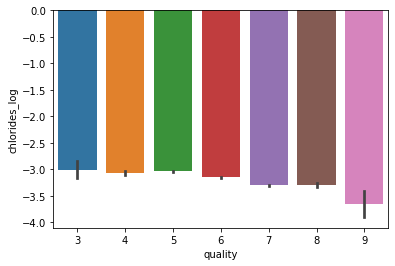

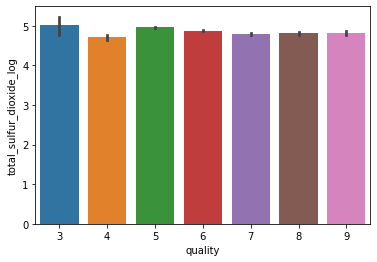

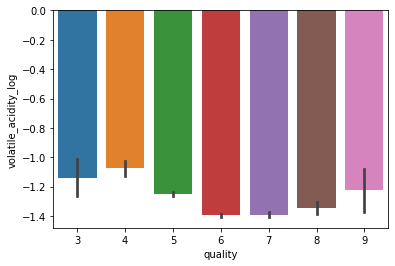

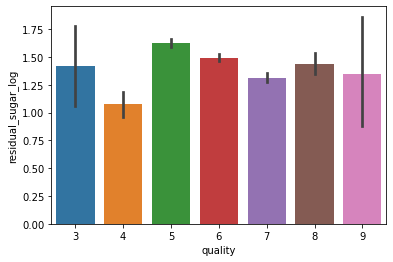

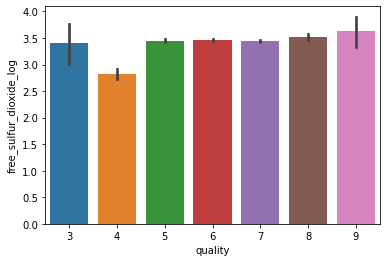

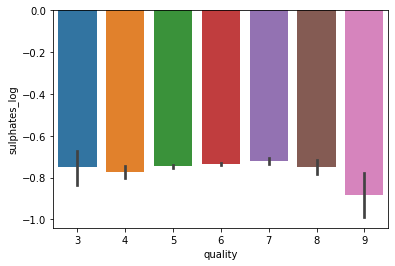

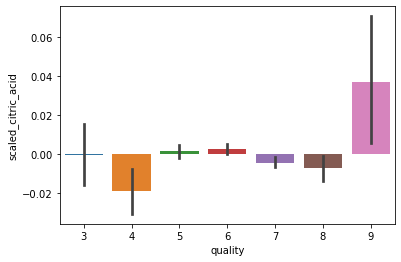

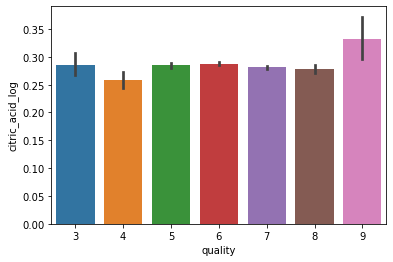

In [155]:
for column in train:
    sns.barplot(data=train, x='quality', y=column)
    plt.show()

In [158]:
data = ['fixed_acidity', 'citric_acid_log', 'pH', 'alcohol', 'white', 'red', 'chlorides_log', 'total_sulfur_dioxide_log', 'volatile_acidity_log', 'residual_sugar_log', 'free_sulfur_dioxide_log', 'sulphates_log']

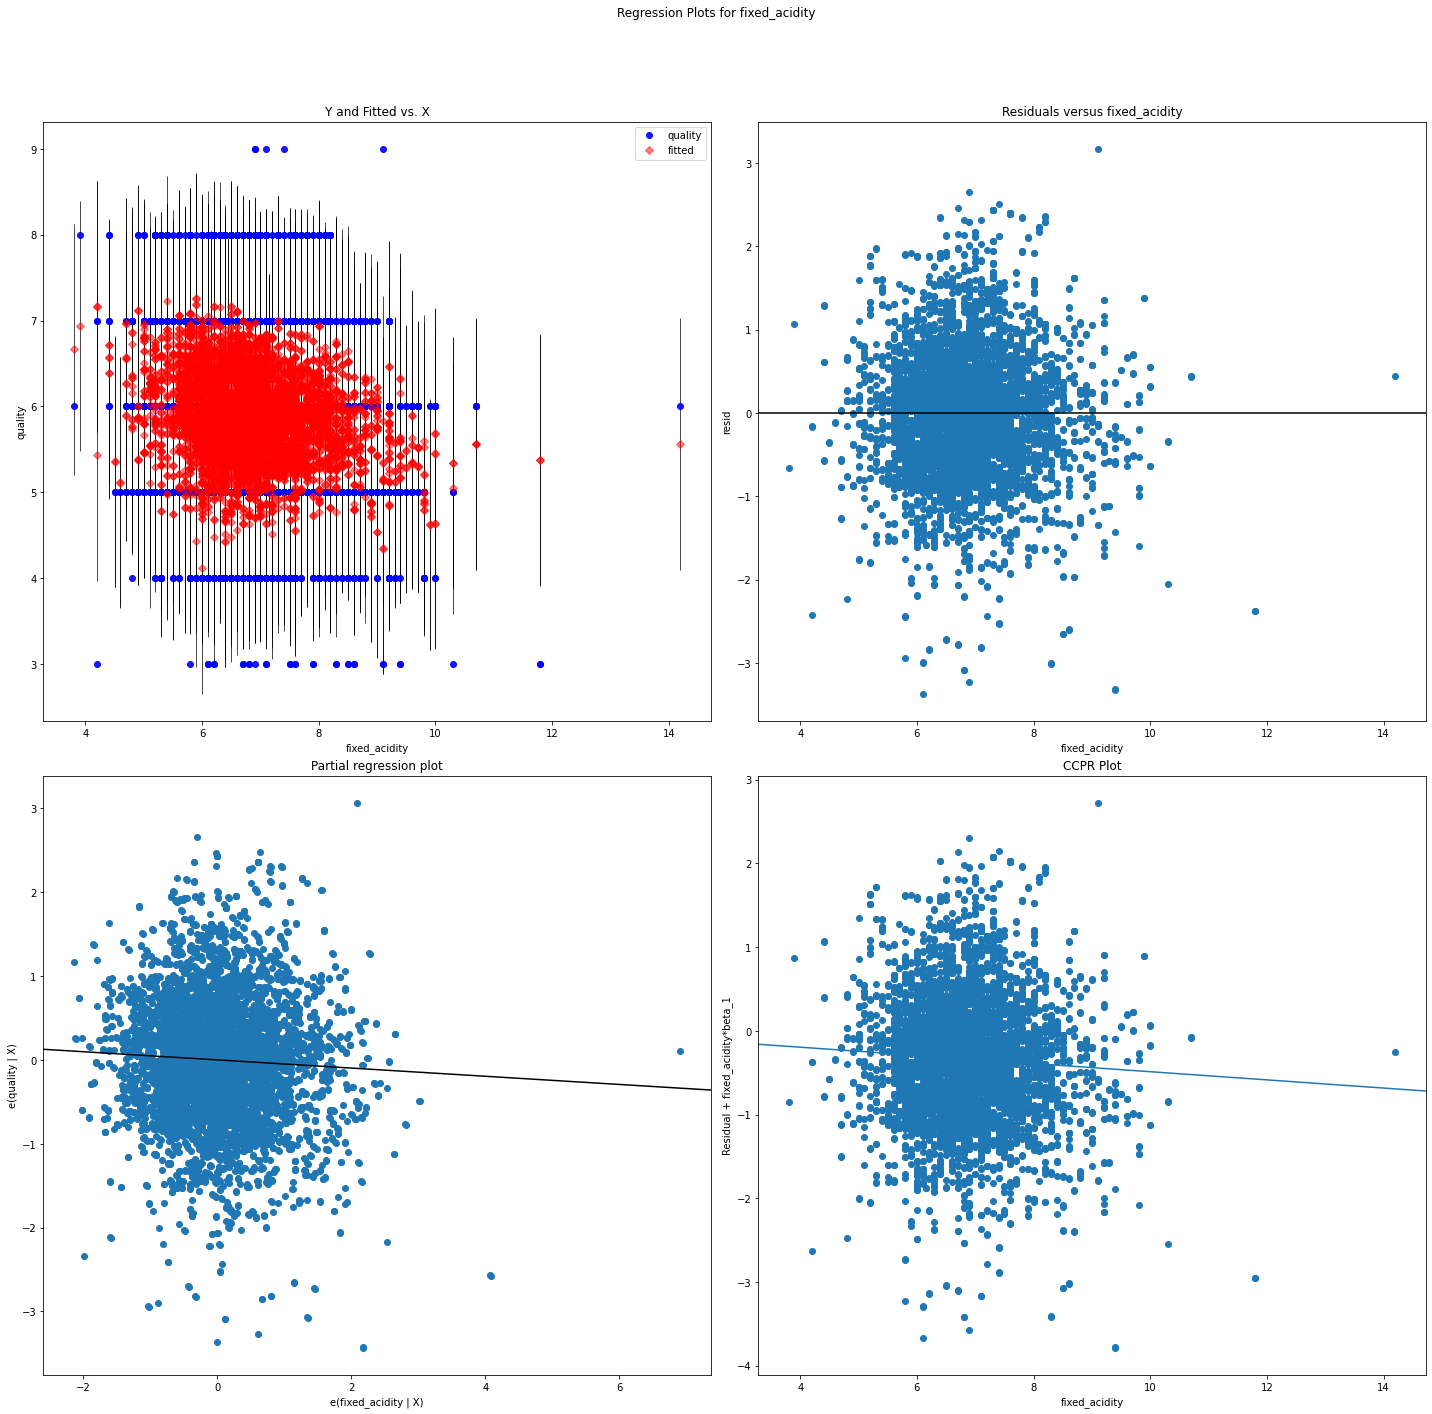

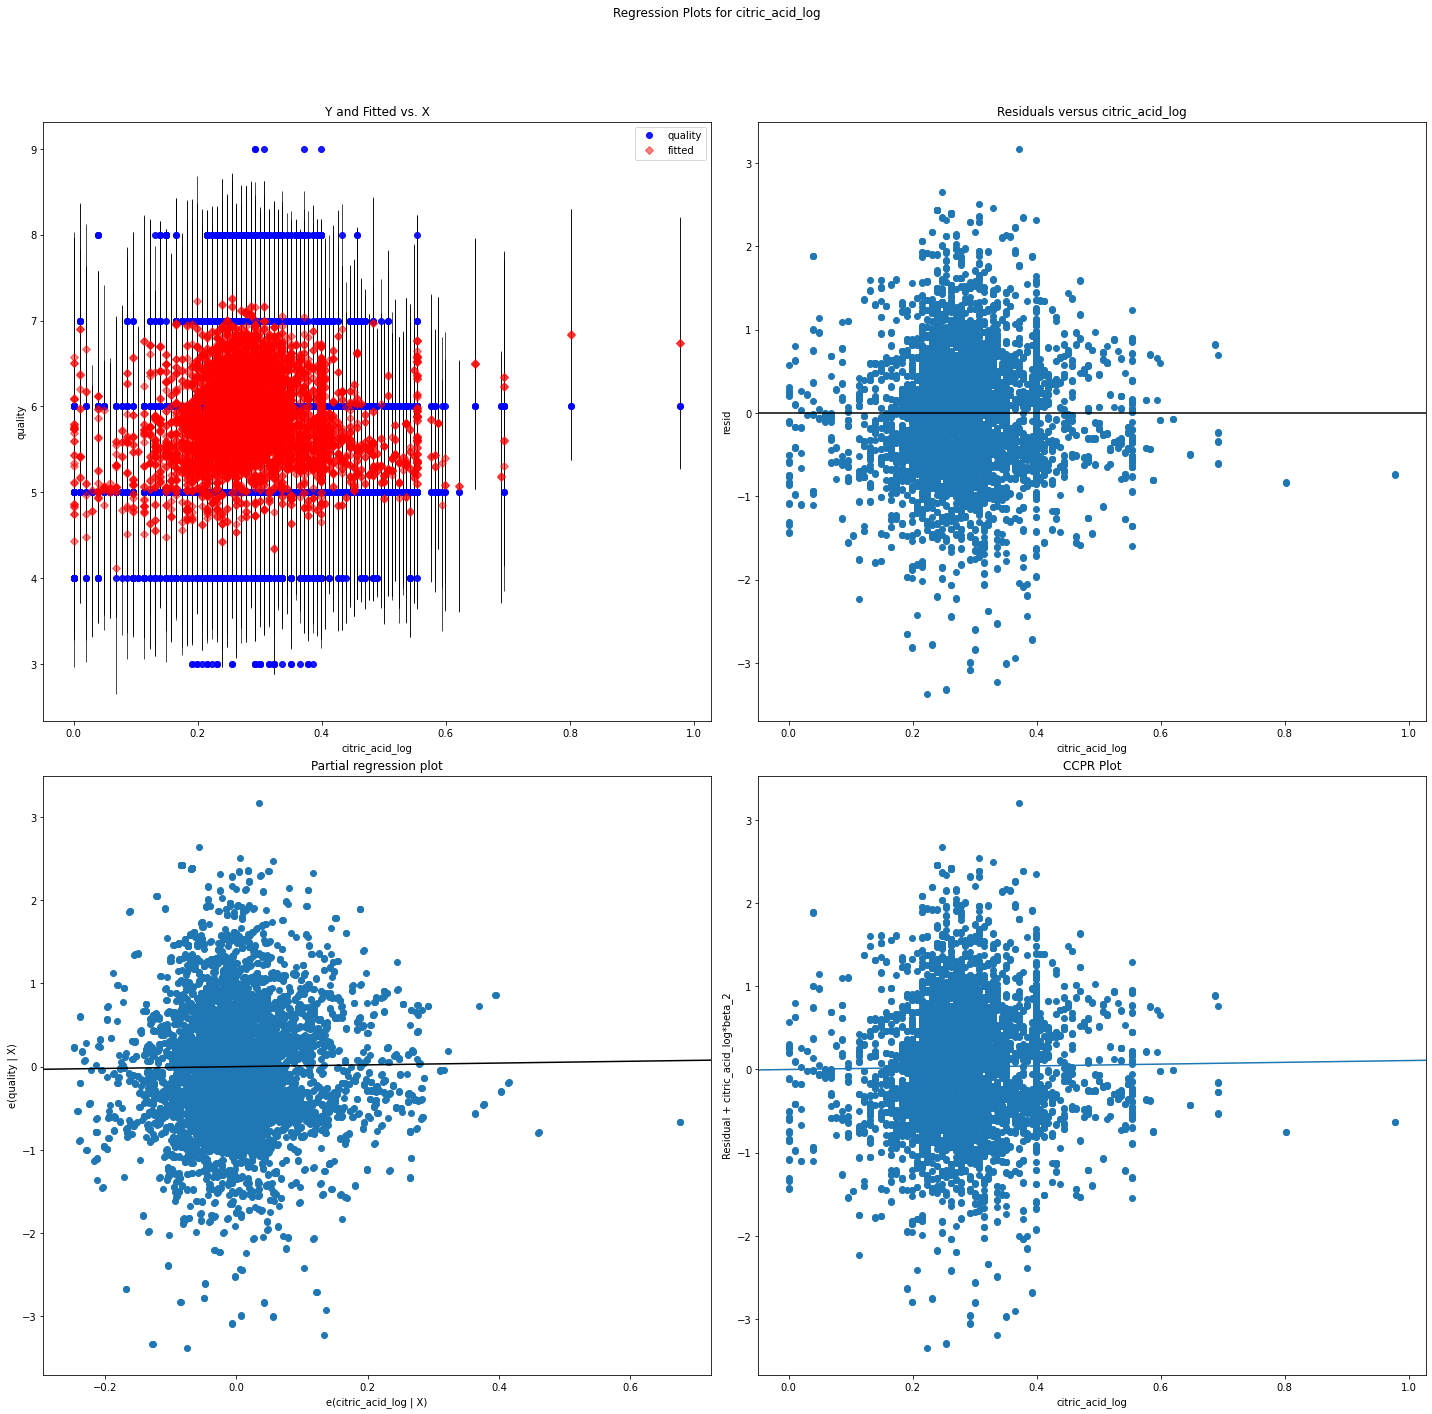

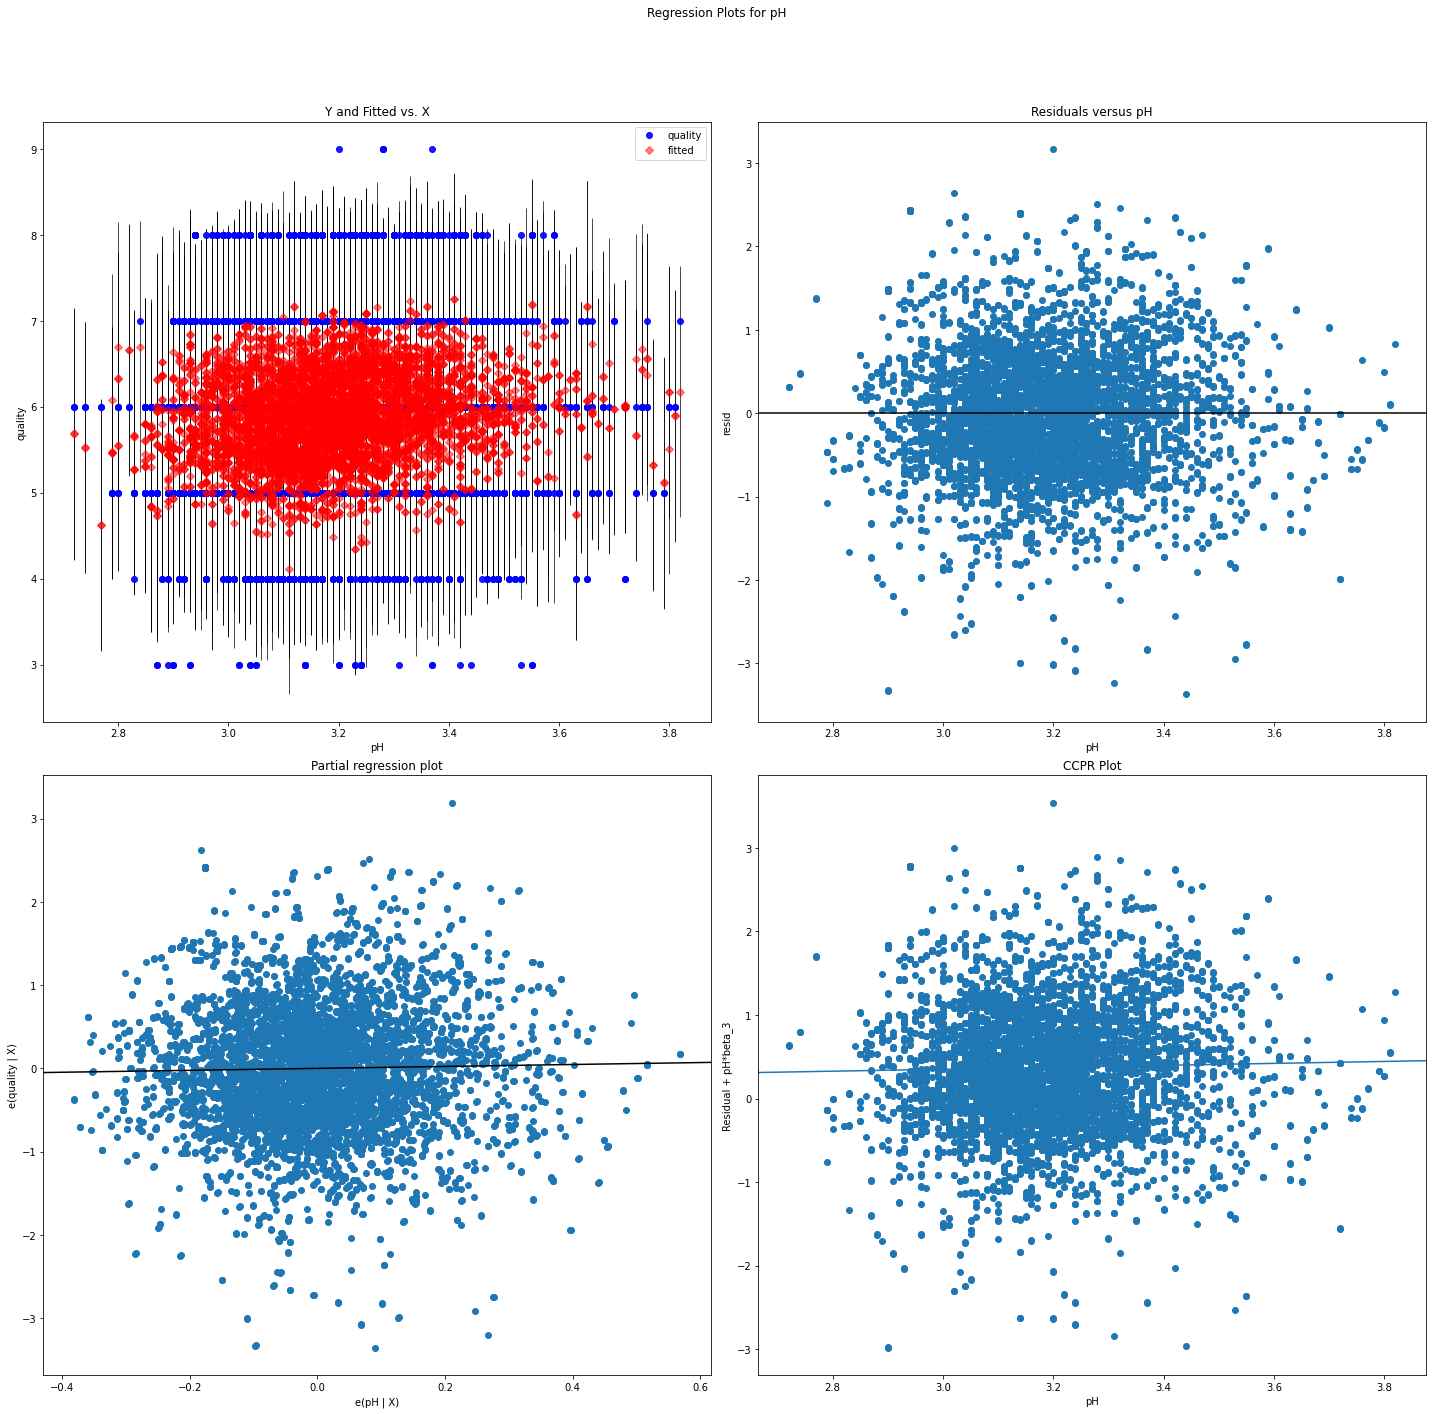

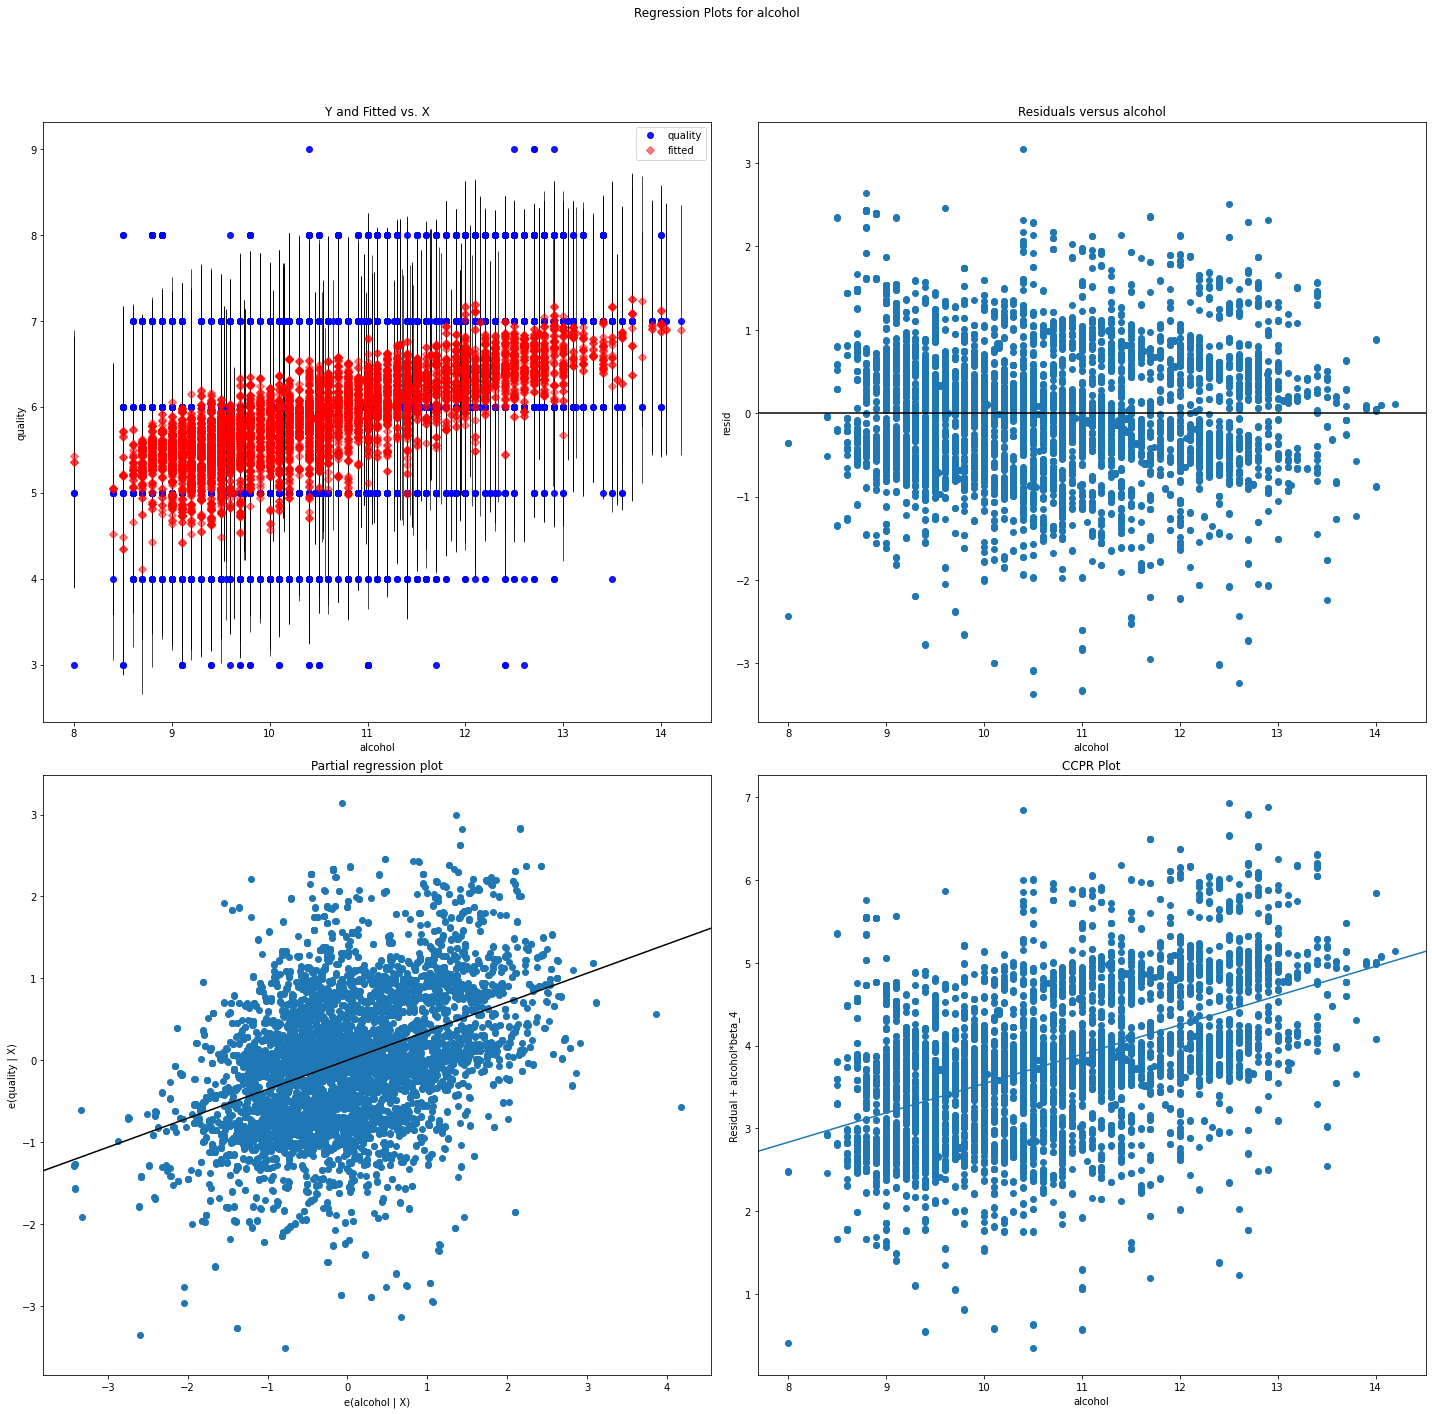

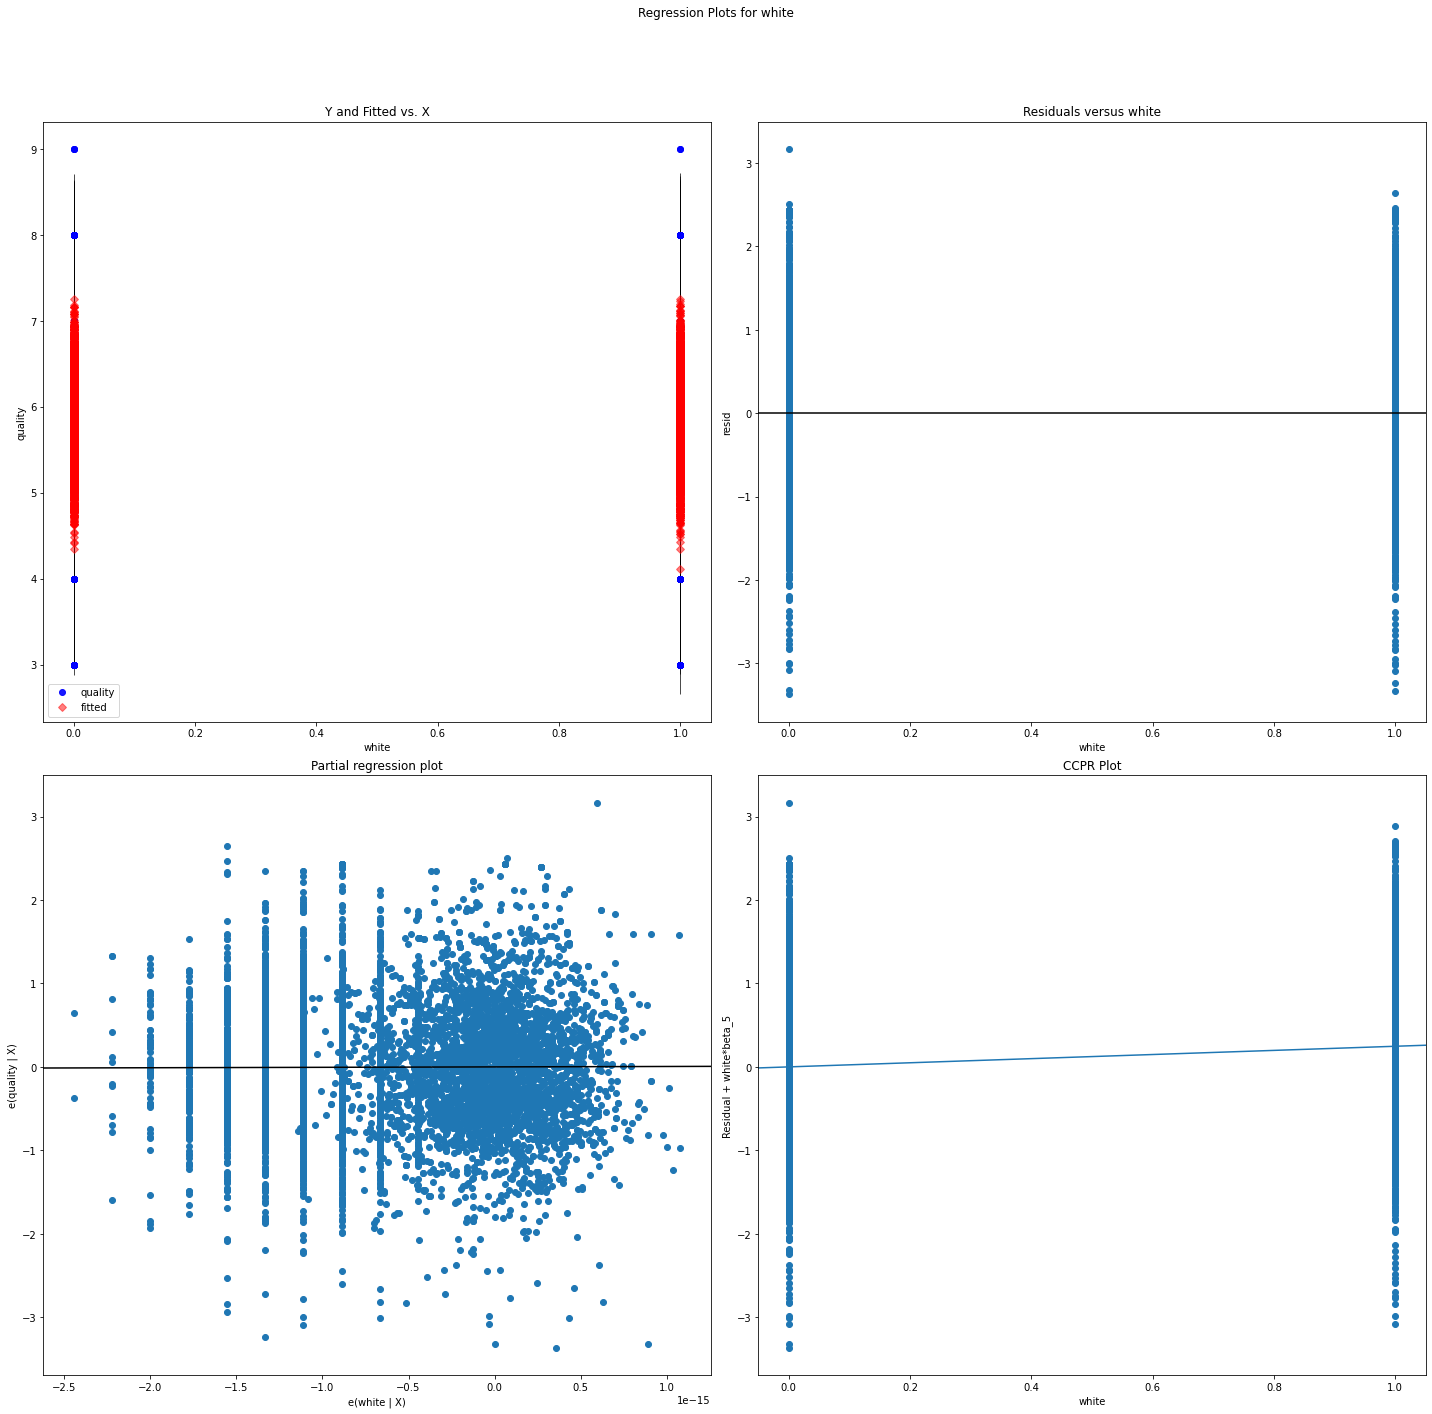

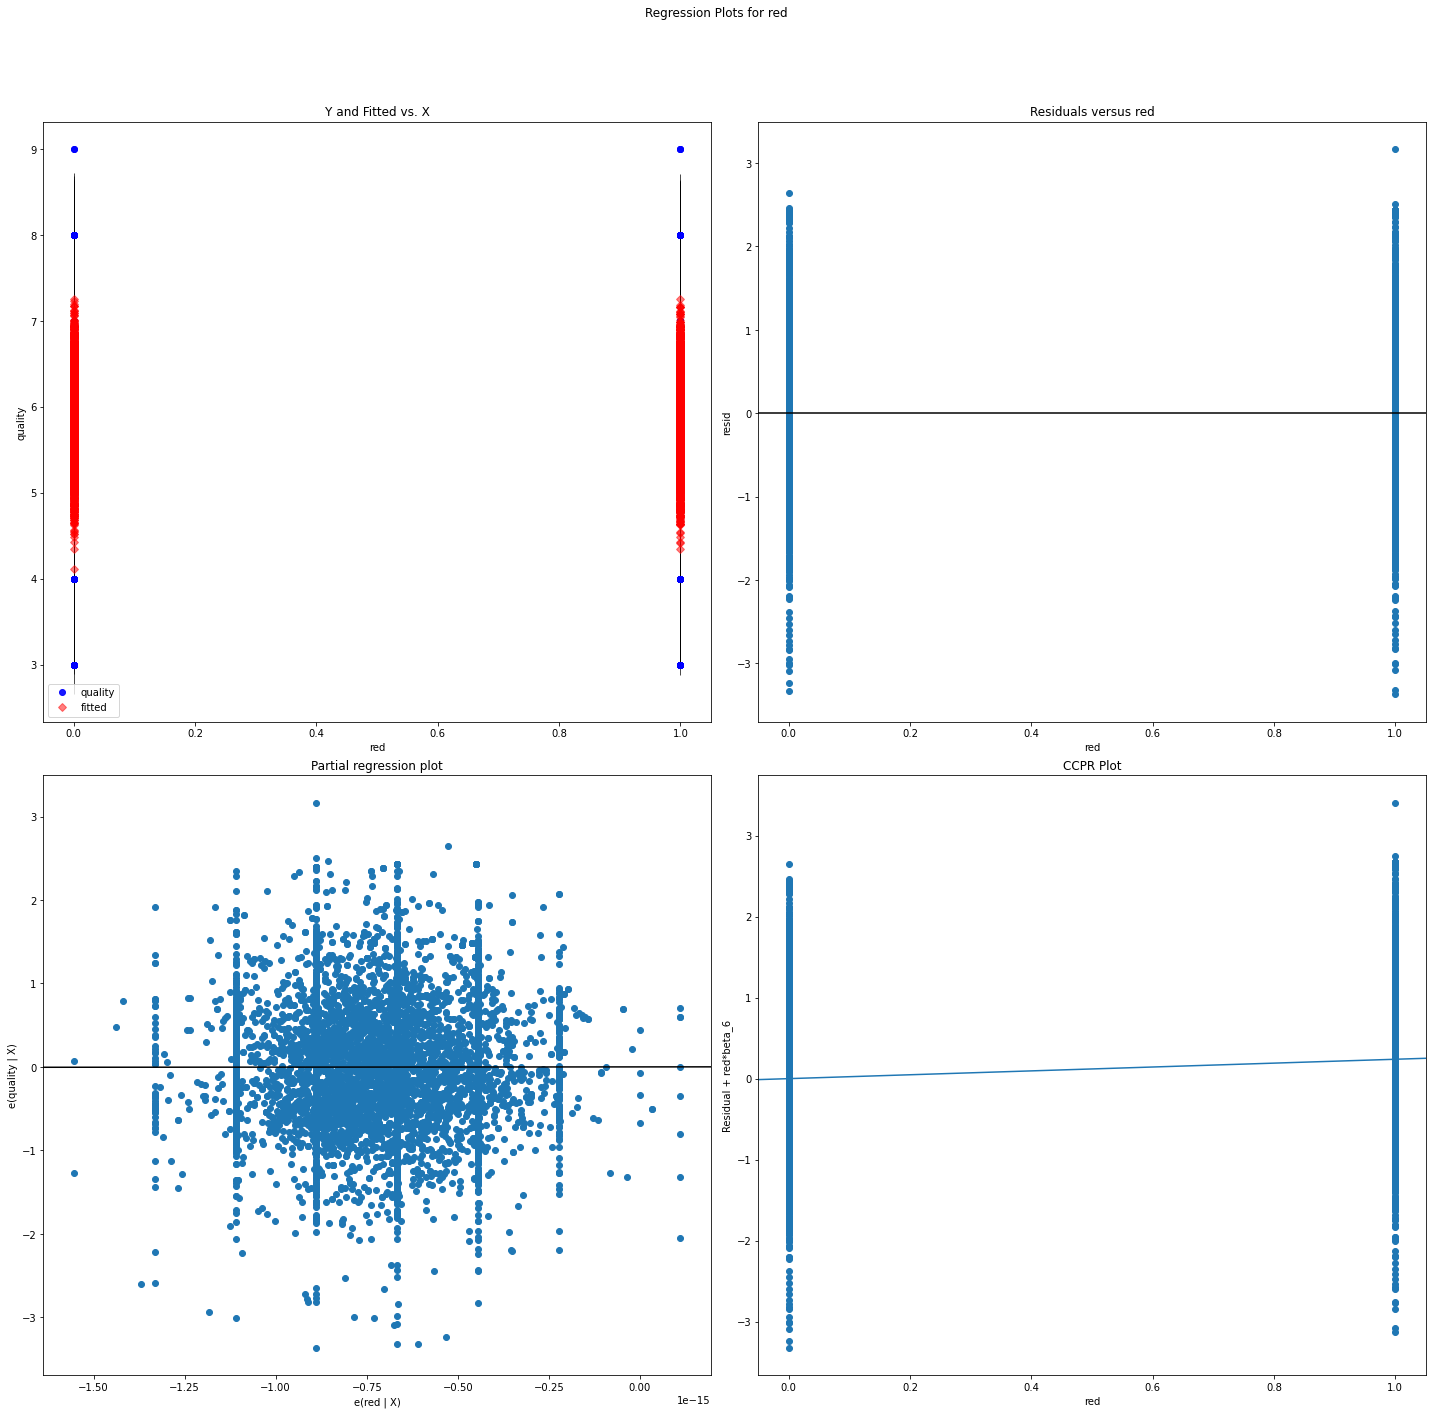

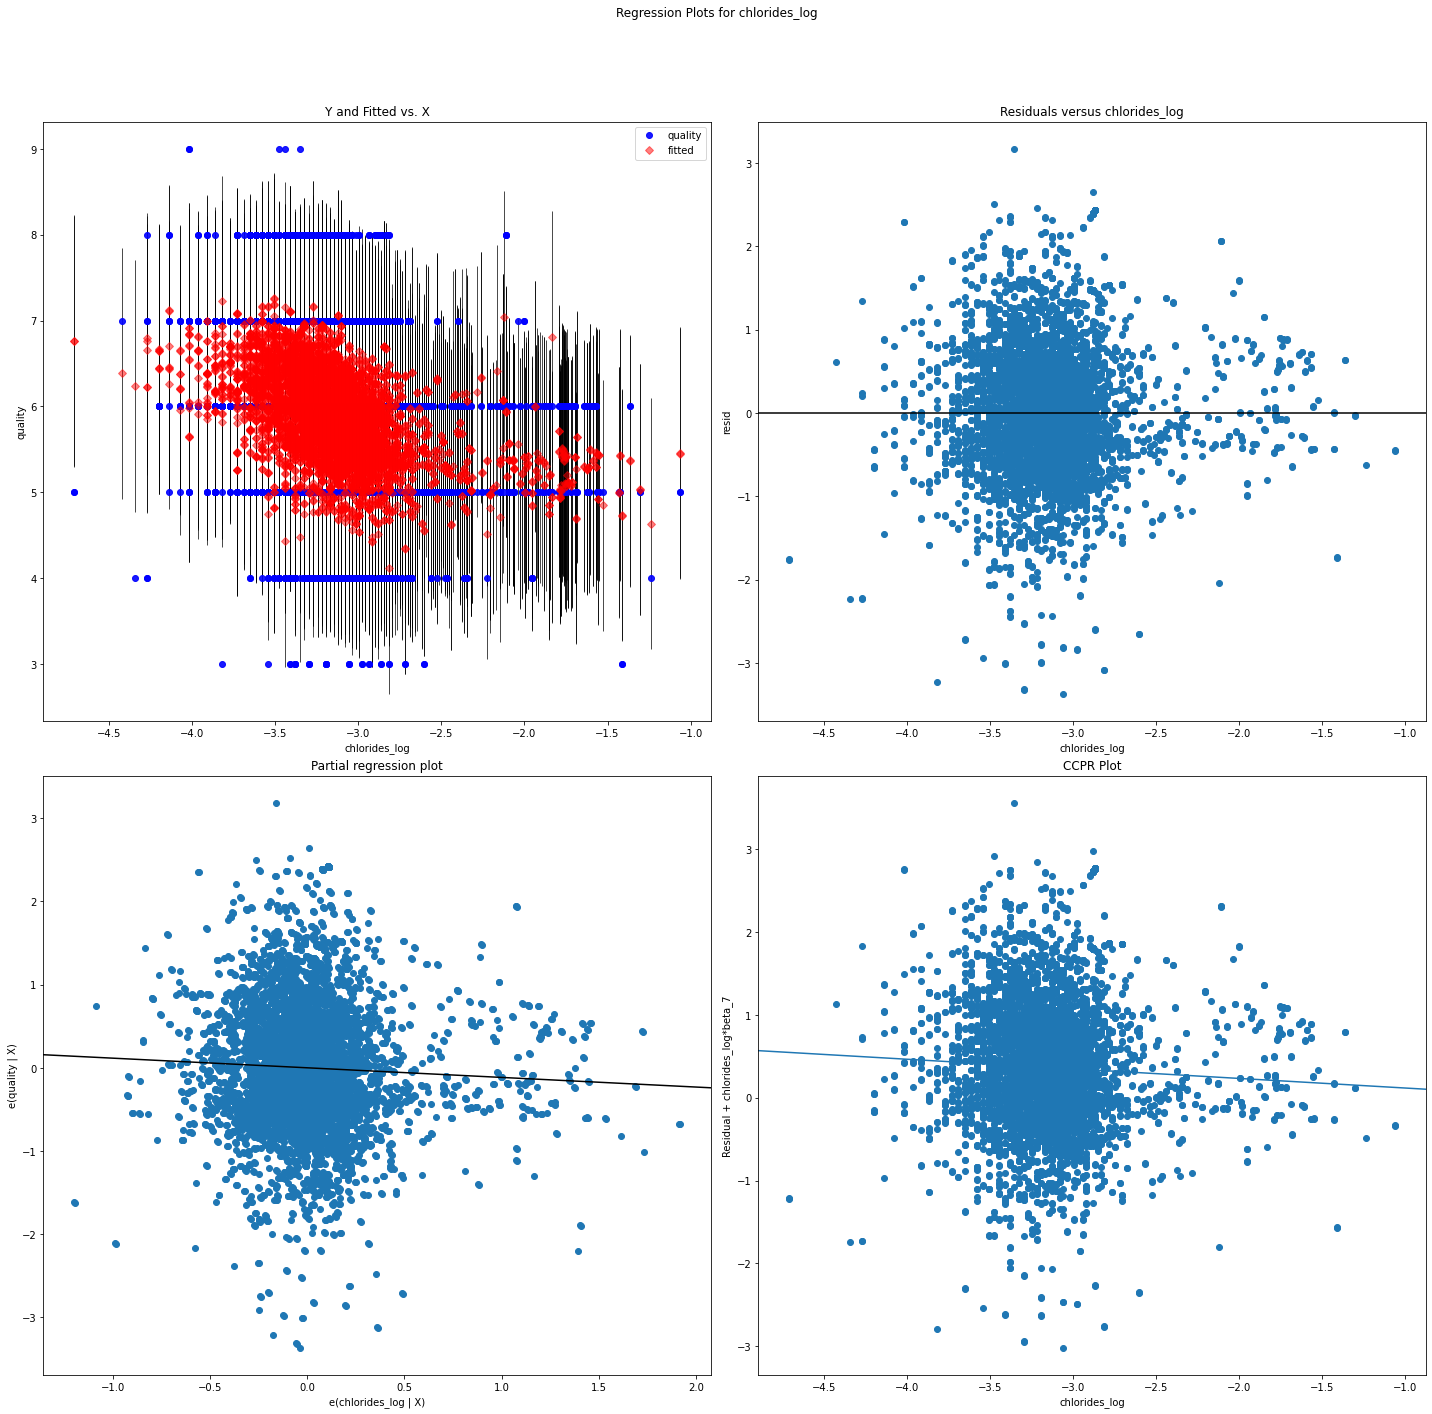

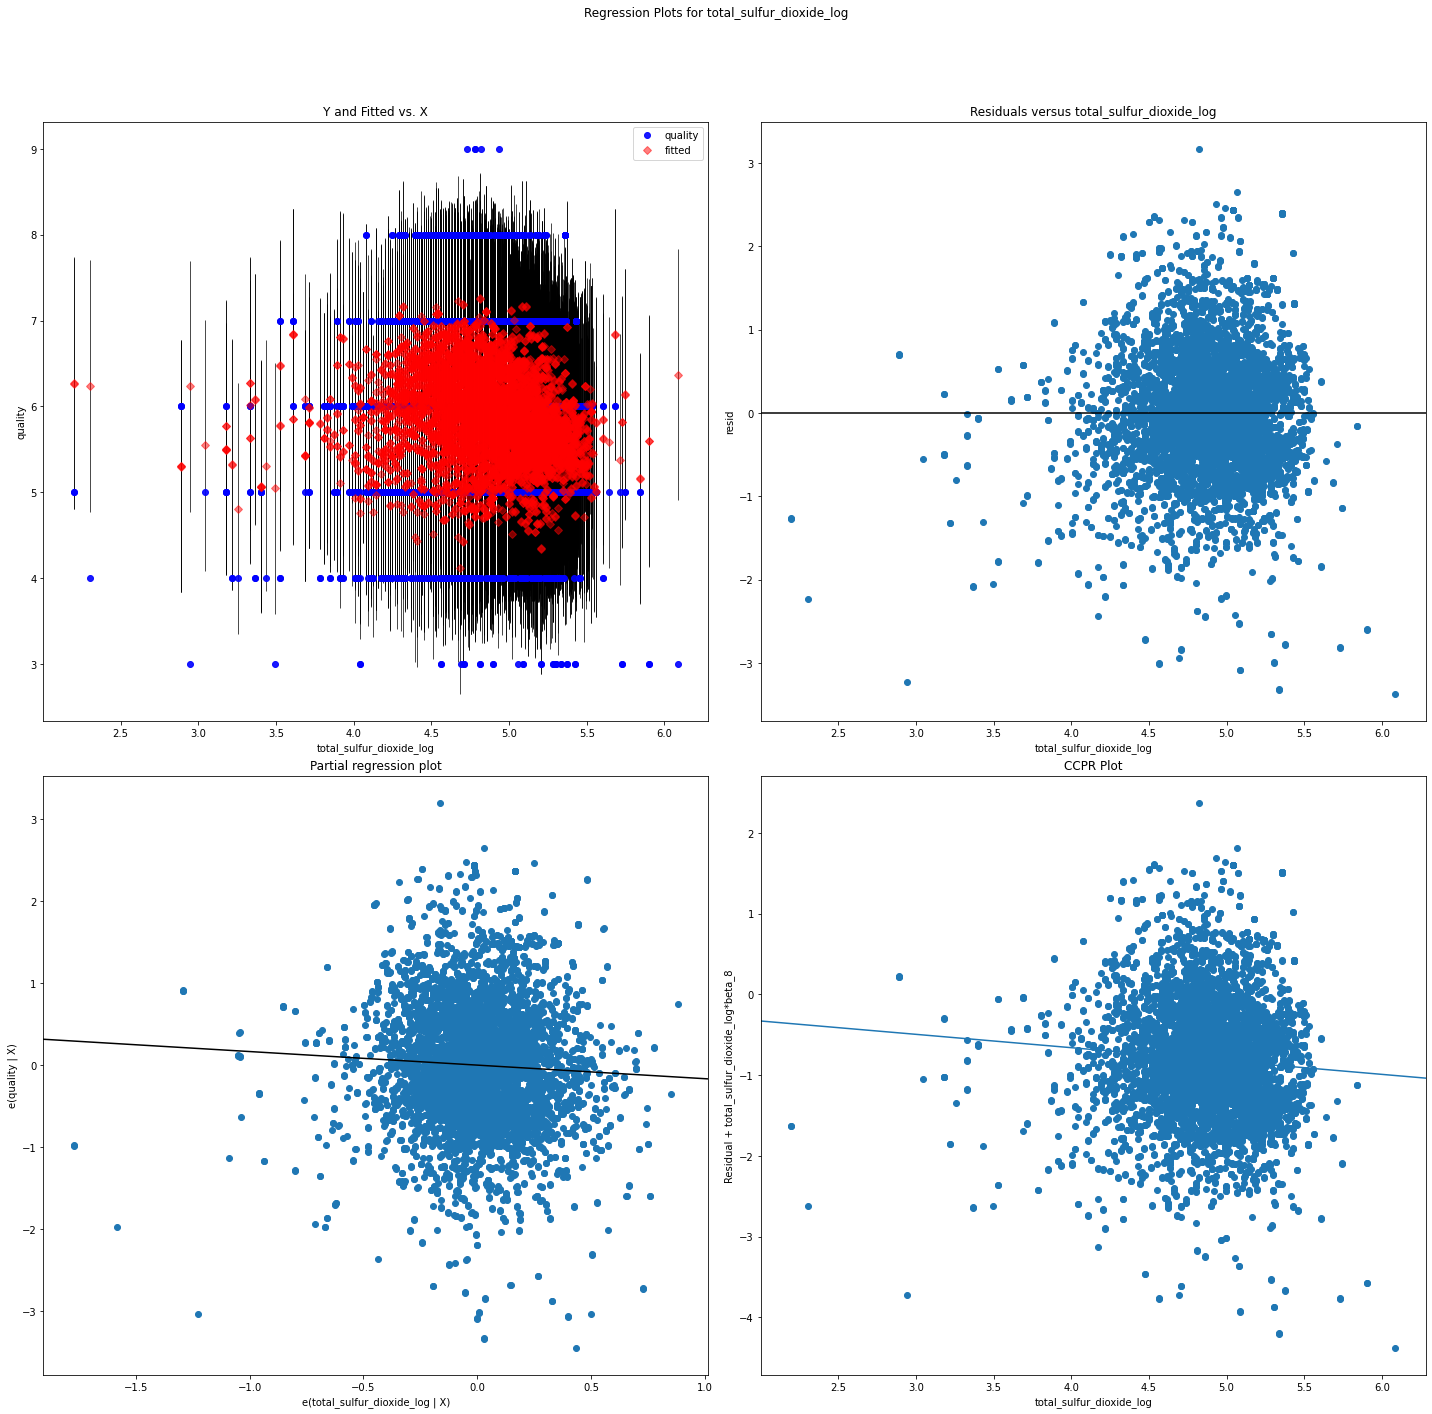

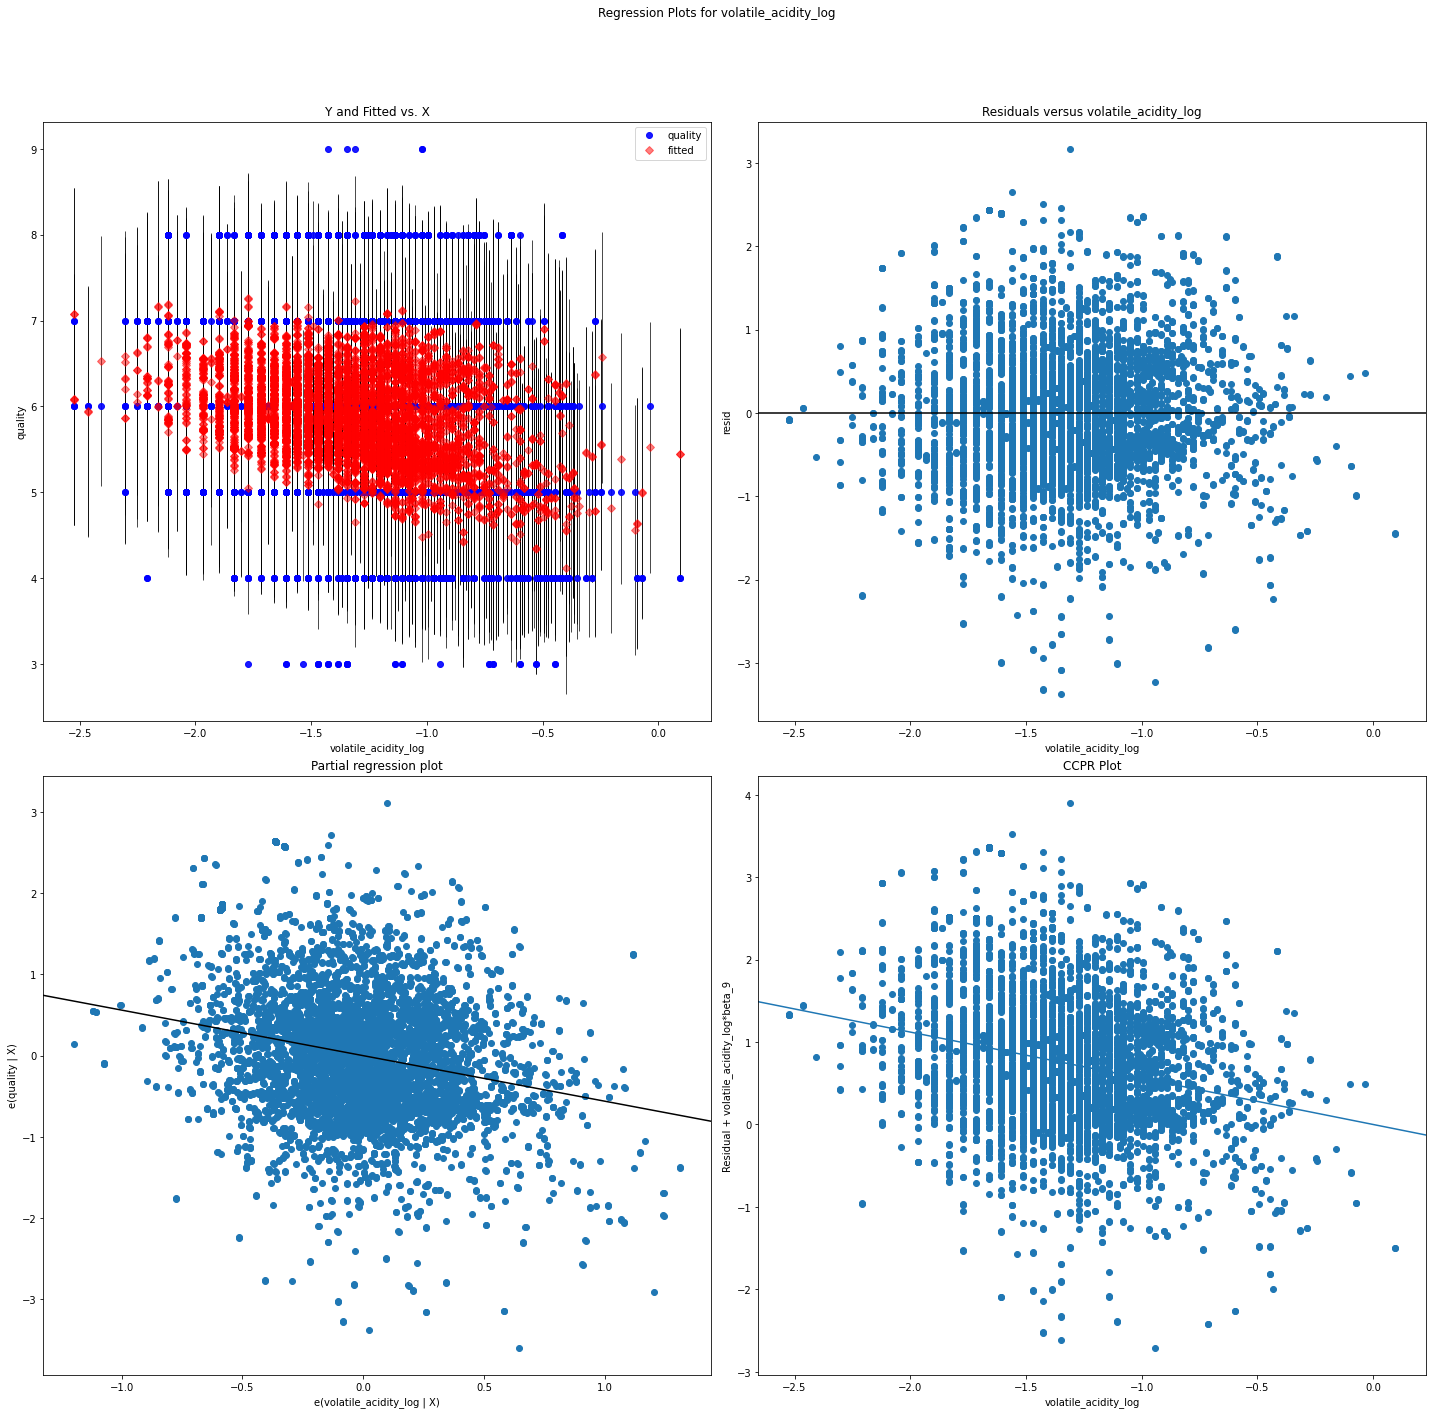

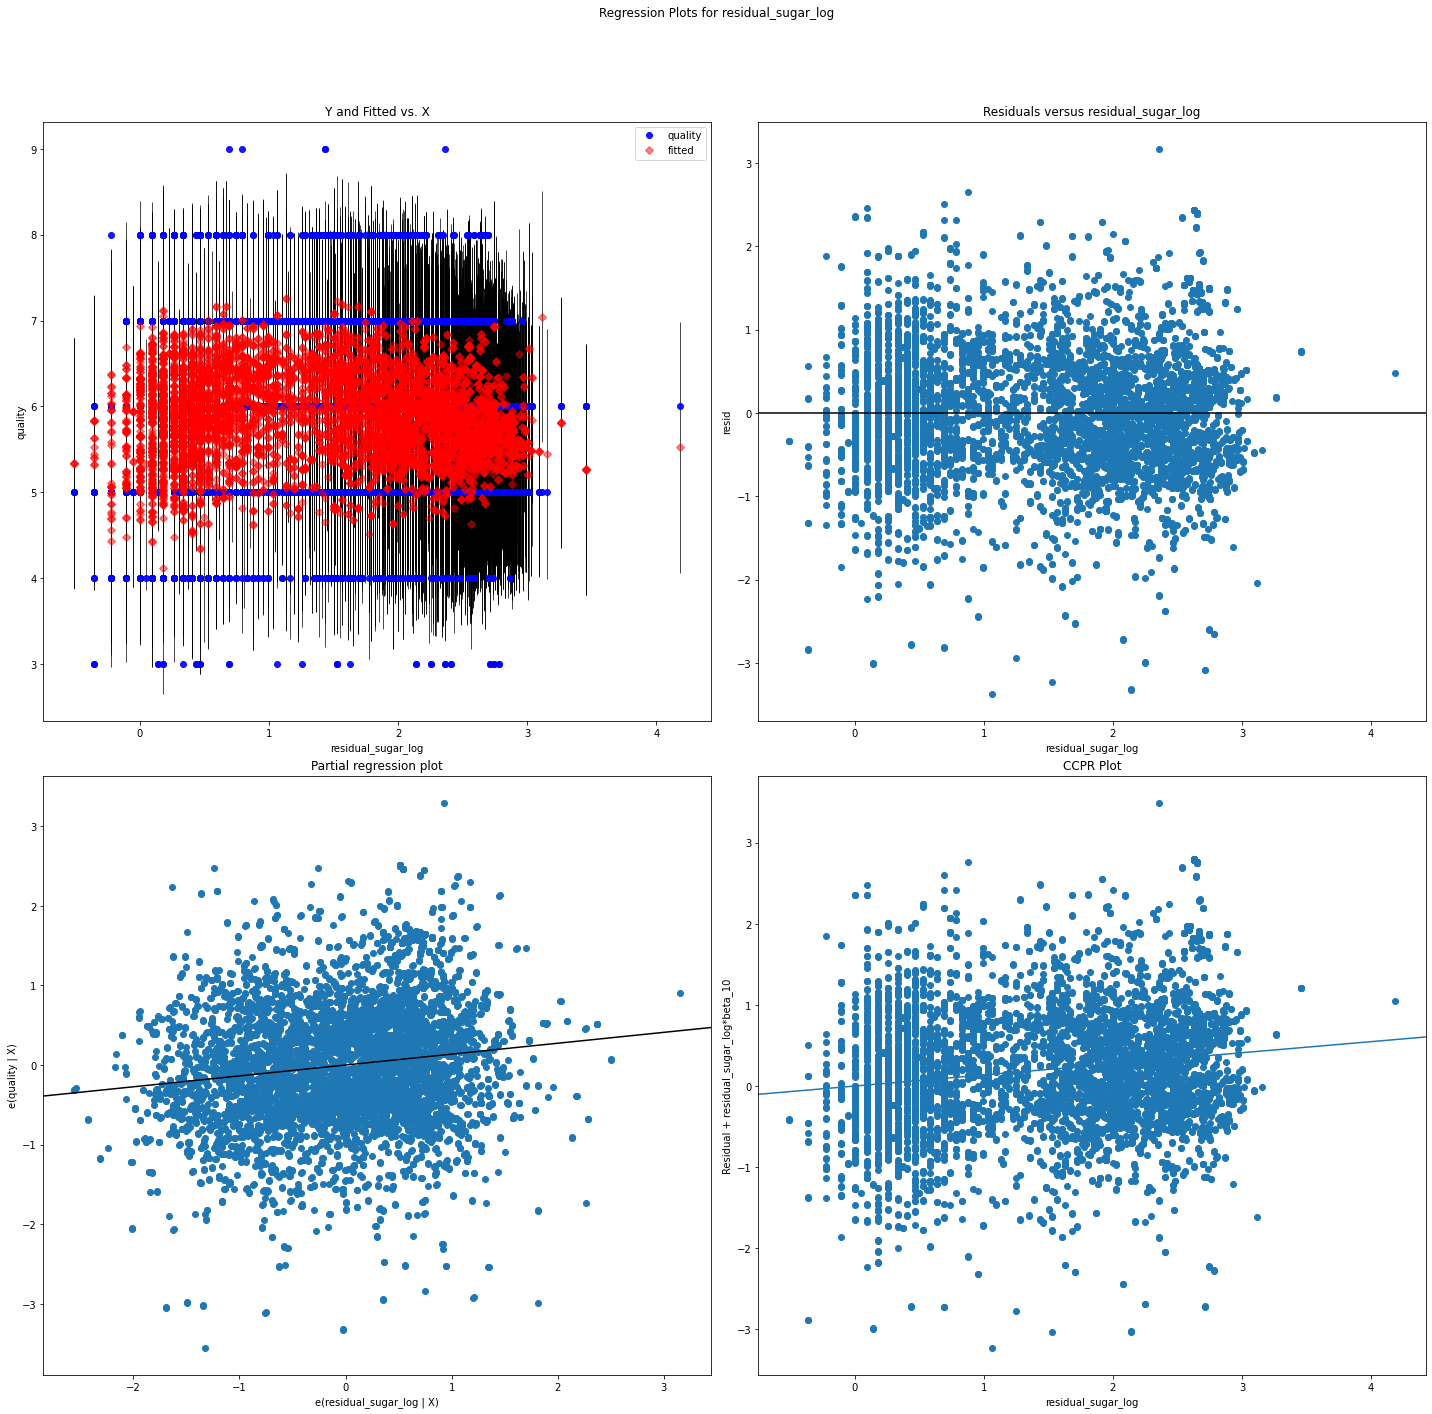

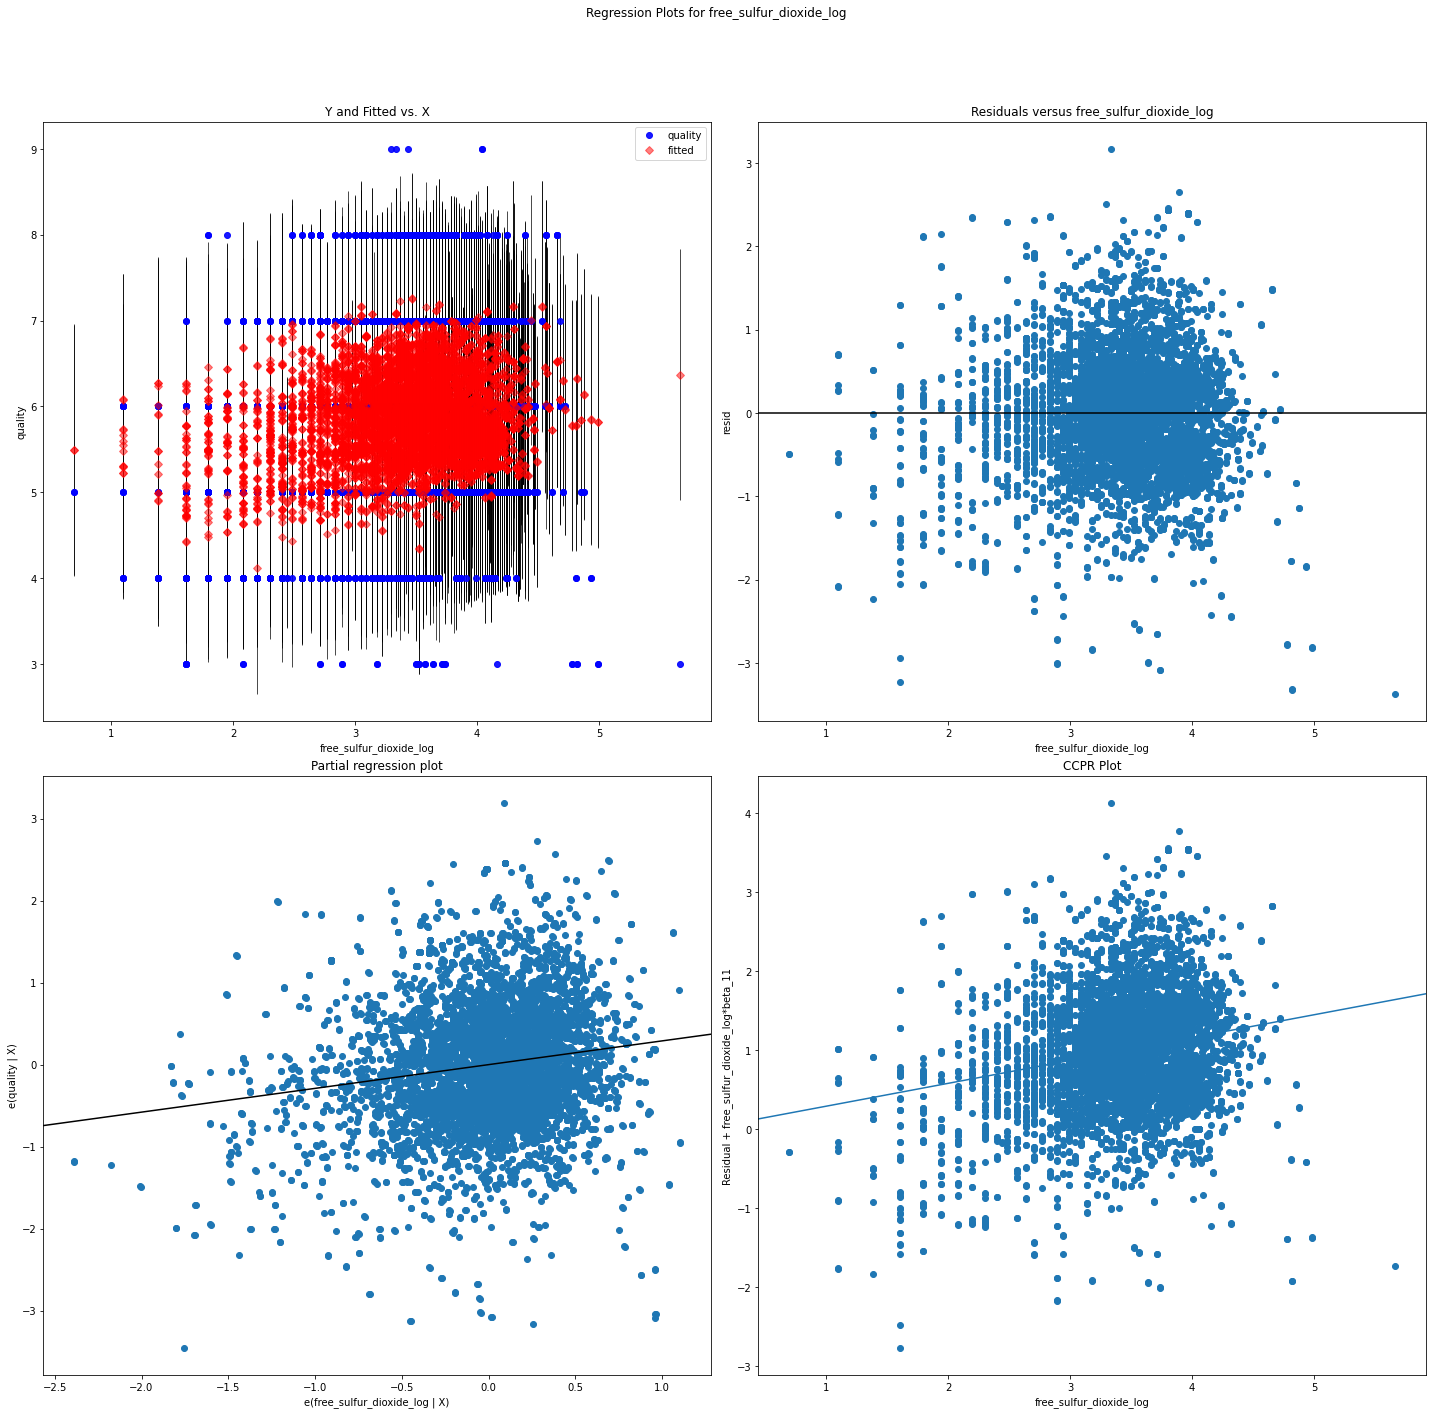

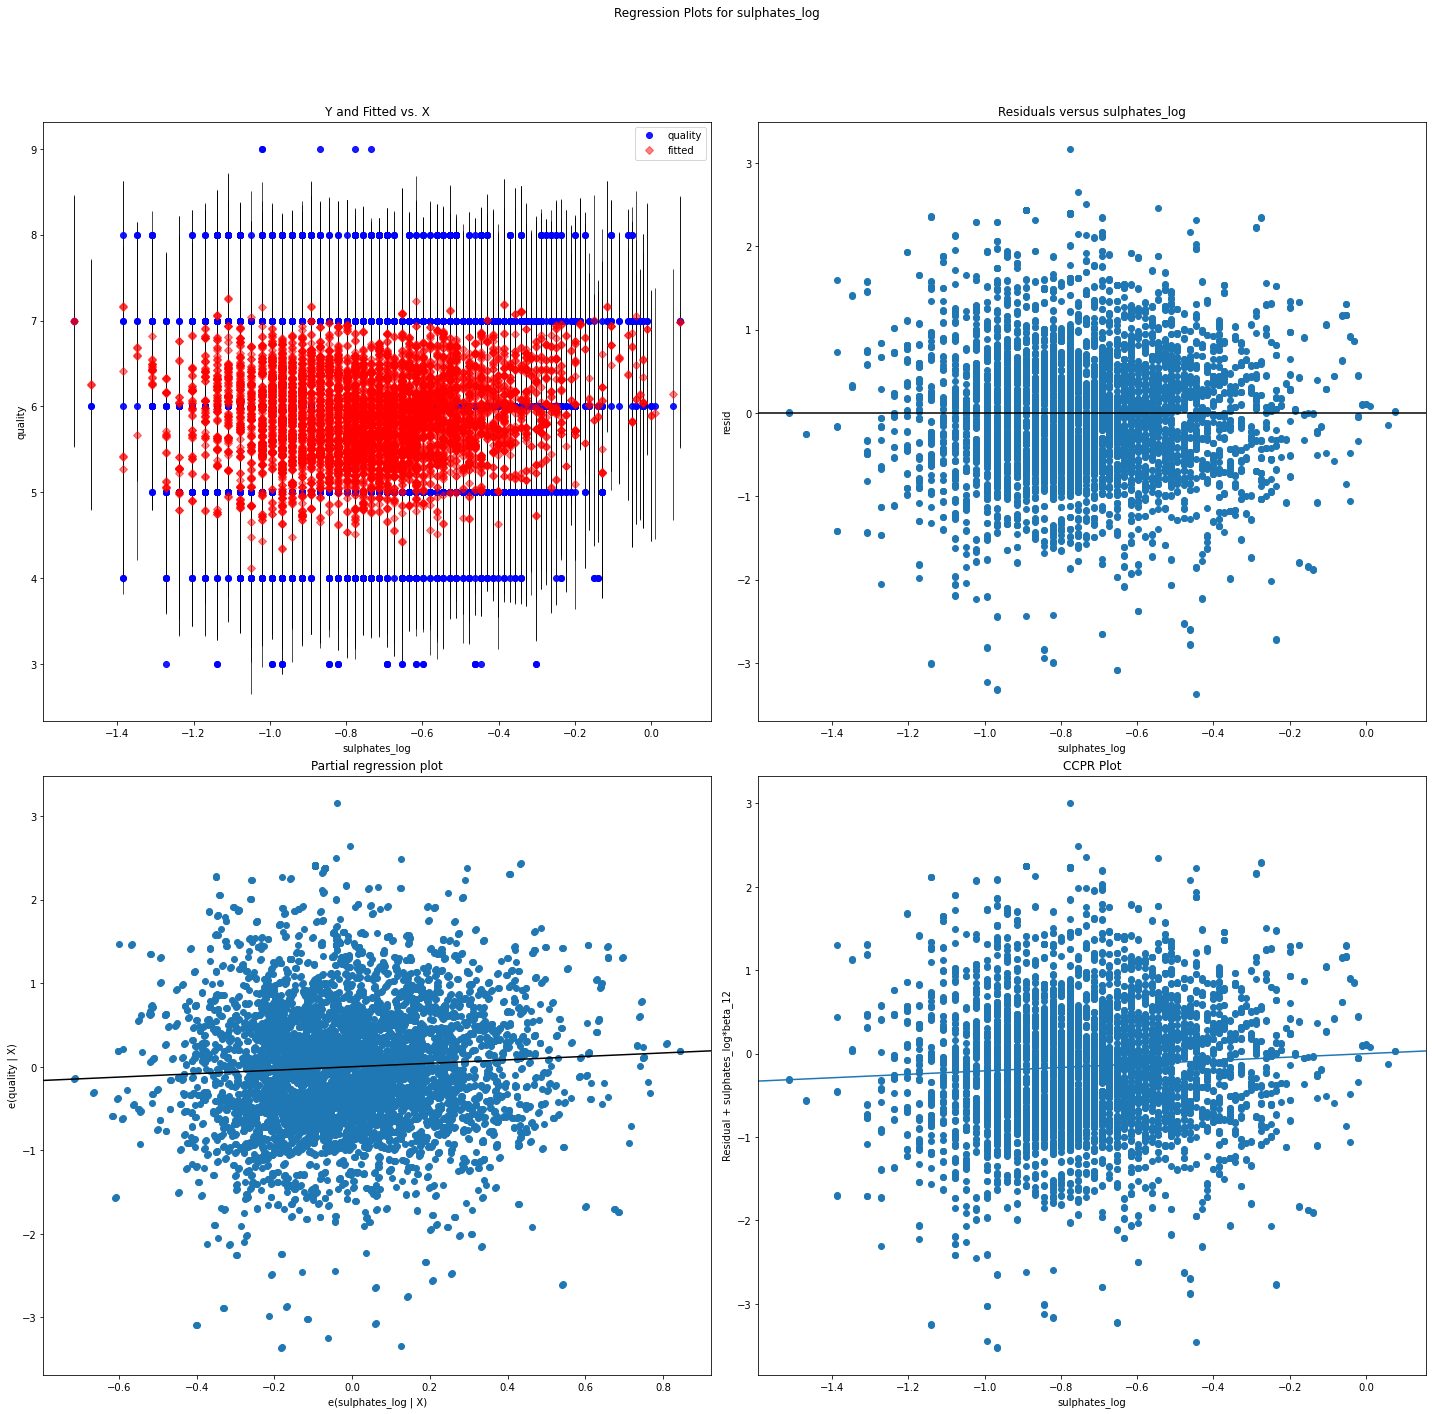

In [159]:
for column in data:
    fig = plt.figure(figsize=(20, 20))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)

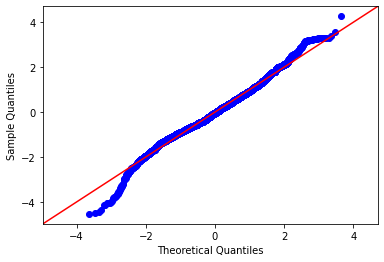

In [161]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Iteration 4

In [166]:
f = 'quality ~ pH + alcohol + white + red + volatile_acidity_log + residual_sugar_log + sulphates_log'
model = ols(formula=f, data=train).fit()

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     474.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:46:40   Log-Likelihood:                -8922.0
No. Observations:                7836   AIC:                         1.786e+04
Df Residuals:                    7829   BIC:                         1.791e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0601      0.142      0.423      0.672      -0.218       0.338
pH                       0.2772      0.059      4.726      0.000       0.162       0.392
alcohol                  0.3738      0.008     48.730      0.000       0.359       0.389
white                    0.0342      0.072      0.477      0.633      -0.106       0.174
red                      0.0259      0.071      0.362      0.717      -0.114       0.166
volatile_acidity_log    -0.6405      0.026    -24.748      0.000      -0.691      -0.590
residual_sugar_log       0.1770      0.010     17.139      0.000       0.157       0.197
sulphates_log            0.1992      0.039      5.104      0.000       0.123       0.276
==============================================================================
Omnibus:                      134.714   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.298
Skew:                           0.036   Prob(JB):                     3.33e-59
Kurtosis:                       3.905   Cond. No.                     3.46e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.37e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""